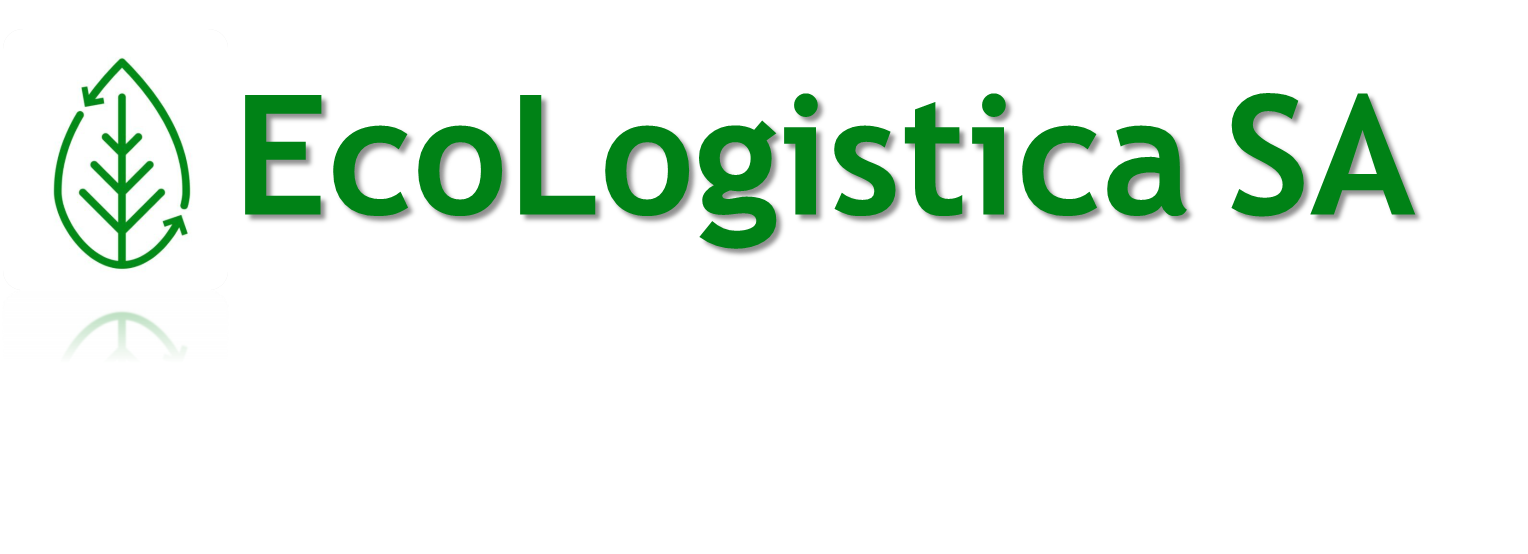

#  <span style="color:rgb(50,100,100);"><strong>&#128304; Desafío entregable #11: Segunda Entrega Proyecto Final &#128304;</strong></span>

## **<u>INDICE</u>**

##### **1.  Introduccion**

##### **2.  Contexto y Problema Comercial**
  *2.1  Objetivos y Preguntas de interes*
  
  *2.2  Audiencia*


##### **3.  Inspeccion de datos**


##### **4.  Data Acquisition**


##### **5.  Data Wrangling 1er Parte:**
  **<u>ETAPA 1:</u>**
   *5.1 Combinacion de **df** con **df_codigo_clientes***

  **<u>ETAPA 2:</u>**
  *5.2 Combinacion de **df** con **df_tipo_de_cambio***

  **<u>ETAPA 3:</u>**
  *5.3 Combinacion de **df** con **df_cp_normalizados***


##### **6.  Data Wrangling 2da Parte:**
  *6.1 Creacion de variables para analisis temporal mas detallado*

  *6.2 Descripcion final de las variables*

  *6.3 Analisis de Duplicados y Nulos*


##### **7.  Exploratory Data Analysis - Visualizando Distribuciones** 
  *7.1 Tipo de operaciones y movimientos*

  *7.2 Clientes - Precio - Margen de ganancia*


##### **8. Correlaciones entre las variables**

  
##### **9.  Insights y recomendaciones**

## ⏩ **1. <u>Introduccion</u>** 

La empresa nace en el año 1994 con el objetivo de desarrollar nuevas estrategias en el ámbito de las entregas puerta a puerta a nivel Nacional.

A través de los años la empresa se va consolidando en el rubro, logrando un nombre de prestigio en el mercado.

A lo largo de sus primeros 22 años de vida, ECOLOGISTICA no solo logra crecer en volumen y especialización, sino que también incorpora nuevos servicios, todos ellos de alto valor agregado.

## ⏩ **2. <u>Contexto y Problema Comercial</u>**

La empresa ECOLOGISTICA se dedica a ofrecer servicios de envío y logística a nivel nacional. En su operación diaria, la empresa realiza diferentes tipos de operaciones para sus clientes, desde el transporte de paquetes y distribución de productos. Además, la empresa se enfrenta a desafíos relacionados con la facturación y la rentabilidad, así como con la duración de los envíos a diferentes zonas de destino.

Uno de los problemas que la empresa enfrenta es la falta de información detallada sobre el tipo de operación más frecuente que realiza, lo que dificulta la toma de decisiones informadas sobre su operación diaria y su rentabilidad. Además, la empresa no cuenta con un análisis exhaustivo de la facturación y los costos, lo que dificulta la identificación de los costos más significativos y los clientes más rentables.

Para abordar estos problemas, es necesario llevar a cabo un análisis detallado de la operación diaria de la empresa, recopilar y analizar los datos de facturación y costos,según la zona de destino. De esta manera, la empresa podrá tomar decisiones informadas sobre su operación diaria, identificar las áreas de mejora en su rentabilidad y satisfacer mejor las necesidades de los clientes.

### 🔦 **2.1  <u>Objetivos y Preguntas de interes</u>**

**Objetivo**: Analizar el volumen y la distribución de los envíos según el cliente, la zona destino, la provincia y el tiempo.

**Preguntas**:
*¿Qué clientes tienen el mayor y el menor número de envíos y bultos?
¿Qué zonas y provincias tienen el mayor y el menor número de envíos y bultos?
¿Cómo varía el número de envíos y bultos según el año, el mes, la semana y el día de la semana?*

**Objetivo**: Analizar la rentabilidad de los envíos según el precio, el costo, el margen y la zona destino.

**Preguntas**:
*¿Qué zonas tienen el mayor y el menor precio, costo, margen y rentabilidad por envío?
¿Cómo se relaciona el precio, el costo, el margen y la rentabilidad con el peso, los bultos o el tipo de servicio?
¿Qué factores influyen en la rentabilidad de los envíos?
¿Qué estrategias se pueden implementar para mejorar la rentabilidad de los envíos?*

**Objetivo**: Predecir el precio de los envíos según las variables geográficas, temporales y operativas.

**Preguntas**:
*¿Qué variables se pueden usar para estimar el precio de los envíos?
¿Qué modelo predictivo se puede aplicar para predecir el precio de los envíos?
¿Qué nivel de precisión tiene el modelo predictivo?
¿Qué ventajas tiene predecir el precio de los envíos para la gestión del negocio?*

### 🔦 **2.2 <u>Audiencia</u>**

**La alta dirección de la empresa:** *informar los resultados del análisis y las recomendaciones para mejorar la rentabilidad y la satisfacción del cliente.*

**Los departamentos de operaciones y logística:** *mejorar la eficiencia y la efectividad de los procesos de operaciones y logística.*

**Los analistas de datos y finanzas:** *proporcionar una descripción detallada del análisis de datos y los resultados financieros.*

**Los inversores y accionistas:** *informar sobre la rentabilidad y el desempeño financiero de la empresa.*

## ⏩ **3. <u>Inspeccion de datos</u>**

In [1]:

#Cargamos las librerías
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import missingno as msno;
import warnings;
import matplotlib.ticker as mtick;
warnings.filterwarnings("ignore");

# Configurar pandas para que muestre toda la tabla sin truncar los datos
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);
pd.set_option('display.width', None);
import locale;

# Establecemos el locale a español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8');

## ⏩ **4. <u>Data Acquisition</u>**

Procederemos a cargar los data Set:

   ♦  **1 - df** "contiene el set de datos a trabajar" (fuente: empresa de logistica)*

   ♦  **2 - df_tipo_de_cambio** "contiene el historico del valor del dolar en argentina dia a dia" (fuente: 'https://datos.gob.ar/dataset/sspm-tipos-cambio-historicos/archivo/sspm_175.1')

   ****BIS*** *vale destacar que los datos originales tienen muchos datos sucios lo cual va a requerir una normalizacion de los mismos ordenadamente*


In [2]:
ruta1='F:\\Proyecto\\Proyecto_Coder_DS\\set de datos\\df_proyecto_coder.csv'
ruta2='F:\\Proyecto\\Proyecto_Coder_DS\\set de datos\\tipo_cambio.csv'

df = pd.read_csv(ruta1, delimiter=',')
df_tipo_de_cambio = pd.read_csv(ruta2, delimiter=',')

In [3]:
datasets = {'df': df, 'df_tipo_de_cambio': df_tipo_de_cambio}

for nombre, data in datasets.items():
    print(f'{nombre.upper()}:\n')
    print(f'\t El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas. \n')
    display(data.head())
    display(data.dtypes)
    print("Tipos de datos de cada columna: \n")
    print(data.dtypes.value_counts())

DF:

	 El dataset tiene 2168797 filas y 39 columnas. 



,id,cliente_id,servicio,bultos,peso,tipo_operacion,comprador_cp,comprador_localidad,comprador_provincia,rem_cp,rem_localidad,rem_provincia,grupo,estado,fecha_hora,precio,costo_adicional1,costo_adicional2,costo_adicional3,costo_despacho_a_expreso,costo_distribuidor,costo_interno,costo_por_contrareembolso,costo_por_monitoreo_activo,costo_servicio_retorno,costo_transporte,cliente_nombre,cp_destino,localidad_destino,zona_destino,subzona_destino,provincia_destino,cordon_destino,cp_origen,localidad_origen,zona_origen,subzona_origen,provincia_origen,cordon_origen
0,398567,454,SAC (con retiro producto),1,3.0,ENTREGA PAQUETERIA,1611,DON TORCUATO,BUENOS AIRES,1000,DON TORCUATO,CAPITAL FEDERAL,DEVOLUCION,2DAV-2 VISITA SIN CONTACTO ALGUNO,2020-01-03 10:55:58,555.00,NaN,NaN,NaN,NaN,0.0,70.0,NaN,NaN,NaN,NaN,SmartGenetics SRL,1611,DON TORCUATO,AMBA,GBA,BUENOS AIRES,3,1000,CAPITAL FEDERAL,AMBA,CABA,BUENOS AIRES,1
1,622855,454,SAC (con retiro producto),1,3.0,ENTREGA PAQUETERIA,1611,DON TORCUATO,BUENOS AIRES,1000,CAPITAL FEDERAL,CAPITAL FEDERAL,ENTREGADA,POD-ENTREGADA,2020-05-28 10:41:32,656.29,NaN,NaN,NaN,NaN,0.0,70.0,NaN,NaN,NaN,NaN,SmartGenetics SRL,1611,DON TORCUATO,AMBA,GBA,BUENOS AIRES,3,1000,CAPITAL FEDERAL,AMBA,CABA,BUENOS AIRES,1
2,1279434,454,SAC (con retiro producto),1,3.0,ENTREGA PAQUETERIA,1611,DON TORCUATO,BUENOS AIRES,1000,CAPITAL FEDERAL,CAPITAL FEDERAL,ENTREGADA,POD-ENTREGADA,2021-02-03 07:45:51,856.67,NaN,NaN,NaN,NaN,0.0,70.0,NaN,NaN,NaN,NaN,SmartGenetics SRL,1611,DON TORCUATO,AMBA,GBA,BUENOS AIRES,3,1000,CAPITAL FEDERAL,AMBA,CABA,BUENOS AIRES,1
3,1391674,454,SAC (con retiro producto),1,3.0,ENTREGA PAQUETERIA,1611,DON TORCUATO,BUENOS AIRES,1000,CAPITAL FEDERAL,CAPITAL FEDERAL,ENTREGADA,POD-ENTREGADA,2021-03-30 09:09:27,856.67,NaN,NaN,NaN,NaN,0.0,70.0,NaN,NaN,NaN,NaN,SmartGenetics SRL,1611,DON TORCUATO,AMBA,GBA,BUENOS AIRES,3,1000,CAPITAL FEDERAL,AMBA,CABA,BUENOS AIRES,1
4,1992496,454,SAC (con retiro producto),1,3.0,ENTREGA PAQUETERIA,1611,DON TORCUATO,BUENOS AIRES,1000,CAPITAL FEDERAL,CAPITAL FEDERAL,ENTREGADA,POD-ENTREGADA,2021-10-19 14:59:14,1166.81,NaN,NaN,NaN,NaN,0.0,130.0,NaN,NaN,NaN,NaN,SmartGenetics SRL,1611,DON TORCUATO,AMBA,GBA,BUENOS AIRES,3,1000,CAPITAL FEDERAL,AMBA,CABA,BUENOS AIRES,1


id                              int64
cliente_id                      int64
servicio                       object
bultos                          int64
peso                          float64
tipo_operacion                 object
comprador_cp                    int64
comprador_localidad            object
comprador_provincia            object
rem_cp                          int64
rem_localidad                  object
rem_provincia                  object
grupo                          object
estado                         object
fecha_hora                     object
precio                        float64
costo_adicional1              float64
costo_adicional2              float64
costo_adicional3              float64
costo_despacho_a_expreso      float64
costo_distribuidor            float64
costo_interno                 float64
costo_por_contrareembolso     float64
costo_por_monitoreo_activo    float64
costo_servicio_retorno        float64
costo_transporte              float64
cliente_nomb

Tipos de datos de cada columna: 

object     18
float64    12
int64       9
dtype: int64
DF_TIPO_DE_CAMBIO:

	 El dataset tiene 7697 filas y 18 columnas. 



,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


indice_tiempo                     object
tipo_cambio_bna_vendedor         float64
tipo_cambio_a3500                float64
tipo_cambio_mae                  float64
volumen_mae                      float64
tipo_cambio_implicito_en_adrs    float64
futuro_rofex_usd1m               float64
interes_abierto_1m               float64
futuro_rofex_usd2m               float64
interes_abierto_2m               float64
futuro_rofex_usd3m               float64
interes_abierto_3m               float64
futuro_rofex_usd4m               float64
interes_abierto_4m               float64
futuro_rofex_usd5m               float64
interes_abierto_5m               float64
futuro_rofex_usd6m               float64
interes_abierto_6m               float64
dtype: object

Tipos de datos de cada columna: 

float64    17
object      1
dtype: int64


## ⏩ **5. <u>Data Wrangling </u>**

En esta sección realizaremos algunas transformaciones:

Combinación de *df* con *df_tipo_de_cambio*. De esta forma, obtendremos el valor de cotización del DÓLAR en la fecha correspondiente, lo que nos permitirá obtener la representación en moneda dura de las variables *"precio"* y *"total_costo"*. Para esto, crearemos las variables de *total costo, rentabilidad y margen de ganancias* tanto en **PESOS ARGENTINOS** como en **DÓLARES**. Comprobaremos si exsiten outlier en las variables *precio* asi como todas las realcionadas a los *costos*, de detectarlos se determinara la necesidad de elinarlos o modificarlos. Con el resultado obtenido, generaremos un nuevo conjunto de datos llamado **df_3**.

Para mejorar la calidad y la utilidad de los datos en nuestro proyecto, una vez realizadas estas transformaciones, es necesario convertir las variables "fecha_hora" al formato .date y crear nuevas variables que contengan el nombre del día y el mes correspondientes. De esta forma, podremos realizar un análisis temporal más detallado y obtener una visión más completa de los patrones y tendencias en los datos.

Por ultimo procederemos a realizar una descripción detallada de las variables seleccionadas y analizar los valores nulos para determinar su impacto en el proyecto. Este análisis nos permitirá identificar posibles problemas o sesgos en los datos, así como también nos dará una idea de qué variables son más importantes para nuestro análisis y cómo podemos utilizarlas de manera efectiva.

In [4]:
#validacion del tipo de dato en la variable "fecha_hora"
print(df["fecha_hora"].dtypes)
print(df["fecha_hora"].head(2))
print(df_tipo_de_cambio["indice_tiempo"].dtypes)
print(df_tipo_de_cambio["indice_tiempo"].head(2))

object
0    2020-01-03 10:55:58
1    2020-05-28 10:41:32
Name: fecha_hora, dtype: object
object
0    2002-03-05
1    2002-03-06
Name: indice_tiempo, dtype: object


⭕ Podemos ver que el formato del tipo fecha son incompatibles, si bien son ***object*** y el formato de ambos son en **yy-mm-dd**, el ***df*** tiene **hh-mm-ss**. Por tal motivo, se creara una copia del **"fecha_hora"** la cual contenga solo los **yy-mm-dd**

In [5]:
df["fecha_hora"] = pd.to_datetime(df["fecha_hora"], format="%Y-%m-%d  %H:%M:%S")
df["fecha_hora2"] = df["fecha_hora"].dt.date
df["fecha_hora2"] = pd.to_datetime(df["fecha_hora2"], format="%Y-%m-%d")
df_tipo_de_cambio["indice_tiempo"] = pd.to_datetime(df_tipo_de_cambio["indice_tiempo"], format="%Y-%m-%d")

In [6]:
#verifico que el cambio se haya realizado bien
print(df["fecha_hora"].dtypes)
print(df["fecha_hora"].head(2))
print(df["fecha_hora2"].dtypes)
print(df["fecha_hora2"].head(2))
print(df_tipo_de_cambio["indice_tiempo"].dtypes)
print(df_tipo_de_cambio["indice_tiempo"].head(2))

datetime64[ns]
0   2020-01-03 10:55:58
1   2020-05-28 10:41:32
Name: fecha_hora, dtype: datetime64[ns]
datetime64[ns]
0   2020-01-03
1   2020-05-28
Name: fecha_hora2, dtype: datetime64[ns]
datetime64[ns]
0   2002-03-05
1   2002-03-06
Name: indice_tiempo, dtype: datetime64[ns]


#### 🔦 **5.1** Combinacion de **df** con **df_tipo_de_cambio**

In [7]:
# Definir una lista con los nombres de las columnas que se procesaran
columnas_procesar = [
'precio',
'bultos',
'costo_adicional1',
'costo_adicional2',
'costo_adicional3',
'costo_despacho_a_expreso',
'costo_distribuidor',
'costo_interno',
'costo_por_contrareembolso',
'costo_por_monitoreo_activo',
'costo_servicio_retorno',
'costo_transporte',]

In [8]:
# como las columnas de costos y precios tal vez tengan algun NaN, procedemos ponerele valor '0'
for col in columnas_procesar:
    df[col] = df[col].fillna(0)

In [9]:
#verifico que las variables a procesar tengan relativamente un normal.
valores_maximos = []

for columna in columnas_procesar:
    valor_max = df[columna].max()
    valores_maximos.append((columna, valor_max))
    id_max = df.loc[df[columna].idxmax(), 'id']
    
# ordeno la lista de valores máximos
valores_maximos = sorted(valores_maximos, key=lambda x: x[1], reverse=True)

# Mostrar los 5 mayores
print("Los 5 valores máximos son:")
for i in range(10):
    print(f"{valores_maximos[i][0]}: {valores_maximos[i][1]}")


Los 5 valores máximos son:
precio: 1108048.0
costo_transporte: 615448.61
costo_interno: 361000.0
costo_adicional1: 180008.0
costo_distribuidor: 180008.0
bultos: 11928
costo_adicional2: 0.0
costo_adicional3: 0.0
costo_despacho_a_expreso: 0.0
costo_por_contrareembolso: 0.0


In [10]:
pd.set_option('max_colwidth', 1000)
cl = ['precio', 'costo_interno','bultos']
for columna in cl:
    top_5 = df.nlargest(5, columna)
    print(f"Los 5 ID con el mayor valor en la columna {columna} son:\n")
    print(top_5[['id', columna]])


Los 5 ID con el mayor valor en la columna precio son:

              id     precio
1355102  2375818  1108048.0
1355103  2375819  1108048.0
1960060  2383944  1108048.0
1960061  2383950  1108048.0
1960062  2383951  1108048.0
Los 5 ID con el mayor valor en la columna costo_interno son:

              id  costo_interno
1134857  2420555       361000.0
1140869  3006652       290085.0
1130514  2969636       263057.0
1140772  2265262       219985.5
1140861  2958457       214593.0
Los 5 ID con el mayor valor en la columna bultos son:

              id  bultos
1181303  1554529   11928
1134828  1555559    4000
1134861  2509289    3500
1134857  2420555    2000
1140772  2265262    1533


⭕ Se detecta que las variables **precio**, **costo_interno** y **bultos** valores atipicos. Se consulta con la Empresa sobre estos valores detectas y se procede a eliminar y no tener en cuetna los **id_x** *1653950*, *1642709*, *2071793*, *2489563*

In [11]:
# eliminamos los id_x
ids_a_eliminar = [1653950, 1642709, 2071793,2489563]
df_1 = df[~df['id'].isin(ids_a_eliminar)]

In [12]:
# Unir los DataFrames según la columna 'fecha2' y 'indice_tiempo'
df_1 = pd.merge(df_1, df_tipo_de_cambio, left_on='fecha_hora2', right_on='indice_tiempo')

In [13]:
columnas_procesar.remove('precio')
columnas_procesar.remove('bultos')

# Crea total_costo
df_1['total_costo'] = df_1[columnas_procesar].sum(axis=1)

In [14]:
# Creo columanas al tipo de cambio US$
df_1['total_costo_USD']=df_1['total_costo']/df_1['tipo_cambio_bna_vendedor']
df_1['precio_USD']=df_1['precio']/df_1['tipo_cambio_bna_vendedor']

In [15]:
# Se crea una nueva columna que muestre la rentavilidad y el porcentaje de la rentavilidad sobre el precio de venta
df_1['precio'] = df_1['precio'].fillna(0)
df_1['margen_ganancia'] = df_1['precio'] - df_1['total_costo']
rentabilidad = df_1['margen_ganancia'] / df_1['precio']
rentabilidad[rentabilidad.isna() & (df_1['precio'] == 0) & (df_1['total_costo'] == 0) & (df_1['margen_ganancia'] == 0)] = 0
df_1['rentabilidad'] = rentabilidad

# Se crea una nueva columna que muestre la rentavilidad y el porcentaje de la rentavilidad sobre el precio de venta en USD
df_1['margen_ganancia_USD'] = df_1['precio_USD'] - df_1['total_costo_USD']
rentabilidad_USD = df_1['margen_ganancia_USD'] / df_1['precio_USD']
df_1['rentabilidad_USD'] = rentabilidad_USD

In [16]:
df_2=df_1.copy()

Generar la variable **movimiento**

In [17]:
def movimiento(row):
    if row['cp_origen'] < 2000 and row['cp_destino'] < 2000:
        return 'AMBA-AMBA'
    elif row['cp_origen'] < 2000 and row['cp_destino'] >= 2000:
        return 'AMBA-INTERIOR'
    elif row['cp_origen'] >= 2000 and row['cp_destino'] < 2000:
        return 'INTERIOR-AMBA'
    else:
        return 'INTERIOR-INTERIOR'

# Crear nueva columna "movimiento"
df_2['movimiento'] = df_2.apply(movimiento, axis=1)

In [18]:
columnas_seleccionadas=['id', 'cliente_id', 'cliente_nombre', 'servicio', 'tipo_operacion',
       'bultos', 'peso', 'grupo', 'estado', 
       'fecha_hora', 'fecha_hora2', 
       'tipo_cambio_bna_vendedor', 
       'precio', 'precio_USD', 'total_costo',
       'total_costo_USD',  'margen_ganancia','margen_ganancia_USD', 
       'rentabilidad', 'rentabilidad_USD', 
       'cp_destino', 'localidad_destino',  'provincia_destino', 'zona_destino', 'subzona_destino', 'cordon_destino', 
       'cp_origen', 'localidad_origen','provincia_origen', 'zona_origen', 'subzona_origen', 'cordon_origen','movimiento']

⭕ Finalizada la ETAPA procedemos a cerar el **df_3** para comenzar ahora si el analisis.

In [19]:
df_3=df_2[columnas_seleccionadas].copy()

#### 🔦 **6.1** Creacion de variables para análisis temporal más detallado  

In [20]:
#creo columnas con el nombre y numero del dia, semana y mes de la variable "fecha_hora"
df_3["fecha_hora"] = pd.to_datetime(df_3["fecha_hora"], format="%Y-%m-%d  %H:%M:%S")
df_3['Month_1'] = pd.to_datetime(df_3['fecha_hora']).dt.strftime('%B')
df_3['mes_1'] = pd.to_datetime(df_3['fecha_hora']).dt.month
df_3['day_1'] = pd.to_datetime(df_3['fecha_hora']).dt.strftime('%A')
df_3['dia_1'] = pd.to_datetime(df_3['fecha_hora']).dt.day
df_3['semana_1'] = pd.to_datetime(df_3['fecha_hora']).dt.isocalendar().week
df_3['anio_1'] = pd.to_datetime(df_3['fecha_hora']).dt.year

#### 🔦 **6.2** Descrpcion final de las variables

**'id'** : "Clave que identifica la guia de operación"

**'cliente_id'** : "Clave que identifica a la empresa cliente"

**'cliente_nombre'** : "Nombre de la empresa cliente"

**'servicio'** : "tipo de servicio contratado"

**'tipo_operacion'** : " Variable que identifica el tipo de operación (Retiro, Entrega…)

**'grupo'** : "Cada estado del servicio corresponde a un grupo, esta variable muestra a que grupo corresponde cada estado"

**'estado'** : "estado en el que se encuentra la guia de operacion"

**'peso'** : "peso en kg de envio"

**'bultos'** : "muestra la cantidad bultos que conforman la guia de operación"

**'fecha_hora'** : "fecha de creacion de la guia de operación"

**'fecha_hora2'** : "fecha de creacion de la guia de operación sin hh-mm-ss"

**'tipo_cambio_bna_vendedor'** : "cotizacion del dolar en la fecha"

**'precio'** : "precio de venta del servicio contratado en la guia de operación"

**'precio_USD'** : "precio de venta equivalente en dolares segun Banco Nacion Argentino"

**'total_costo'** : "costo operativo de la guia de operaciones"

**'total_costo_USD'** : "costo operativo de la guia de operaciones en USD"

**'margen_ganancia'** : "diferencia entre el precio y el costo"

**'margen_ganancia_USD'** : "diferencia entre el precio en USD y el costo USD"

**'rentabilidad'** : "porcentaje del margen de ganancia sobre el precio"

**'rentabilidad_USD'** : "porcentaje del margen de ganancia en USD sobre el precio en USD"

**'cp_destino'** : "variable que contiene codigo postal destino"

**'localidad_destino'** : "variable que contiene la localidad destino"

**'provincia_destino'** : "variable que contiene la provincia destino"

**'destino_region'** : "variable que contiene a que region corresponde el destino ('CABA' 'GBA' 'CENTRO' 'NOA' 'NEA' 'CUYO' 'PATAGONIA')"

**'subzona_destino'** : "identifica la zona de destino de la guia de operacion (AMBA, INTERIOR)"

**'cp_origen'** : "variable que contiene codigo postal origen

**'localidad_origen'** : "variable que contiene la localidad origen"

**'provincia_origen'** : "variable que contiene la provincia origen"

**'zona_origen'** : "variable que contiene a que region corresponde el origen ('CABA' 'GBA' 'CENTRO' 'NOA' 'NEA' 'CUYO' 'PATAGONIA')"

**'subzona_origen'** : ""identifica la zona de destino de la guia de operacion (AMBA, INTERIOR)" 

**'cordon_origen', 'cordon_destino'**

**'movimiento'** : "clasifica las guias de operación tomando en cuenta el origen y destino, (AMBA-INTERIOR, INTERIOR-INTERIOR, INTERIOR-AMBA)"



#### 🔦 **6.3** Analisis de Duplicados y Nulos

#####  ***<u>DUPLICADOS</u>***

In [21]:
# Validar si hay duplicados
duplicados = df_3[df_3.duplicated(subset='id')]

if duplicados.shape[0] > 0:
    print(f'Hay {duplicados.shape[0]} filas duplicadas en el DataFrame')
else:
    print('No hay filas duplicadas en el DataFrame')

# Eliminar duplicados
df_3.drop_duplicates(subset='id', inplace=True)

# Verificar el resultado
print(f'\nLuego de la eliminación de duplicados, el dataset tiene {df_3.shape[0]} filas y {df_3.shape[1]} columnas.')


No hay filas duplicadas en el DataFrame

Luego de la eliminación de duplicados, el dataset tiene 2168797 filas y 39 columnas.


#####  ***<u>NULOS</u>***

In [22]:
#Chequeando cantidad de nulos 
serie_nulos = df_3.isnull().sum()
serie_nulos_sorted = serie_nulos.sort_values(ascending=False)
print(serie_nulos_sorted.head(6))

rentabilidad_USD    46676
peso                29854
grupo                   5
estado                  5
servicio                1
subzona_origen          0
dtype: int64


In [23]:
#Analizamos el % que representan estos nulos en el total de datos
porcentaje_perdidos = df_3.isnull().sum() * 100 / len(df_3)
valores_perdidos = pd.DataFrame({'Porcentaje_Missing': porcentaje_perdidos})
valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False, inplace=True)
print(valores_perdidos.head(6))

                  Porcentaje_Missing
rentabilidad_USD            2.152161
peso                        1.376523
grupo                       0.000231
estado                      0.000231
servicio                    0.000046
subzona_origen              0.000000


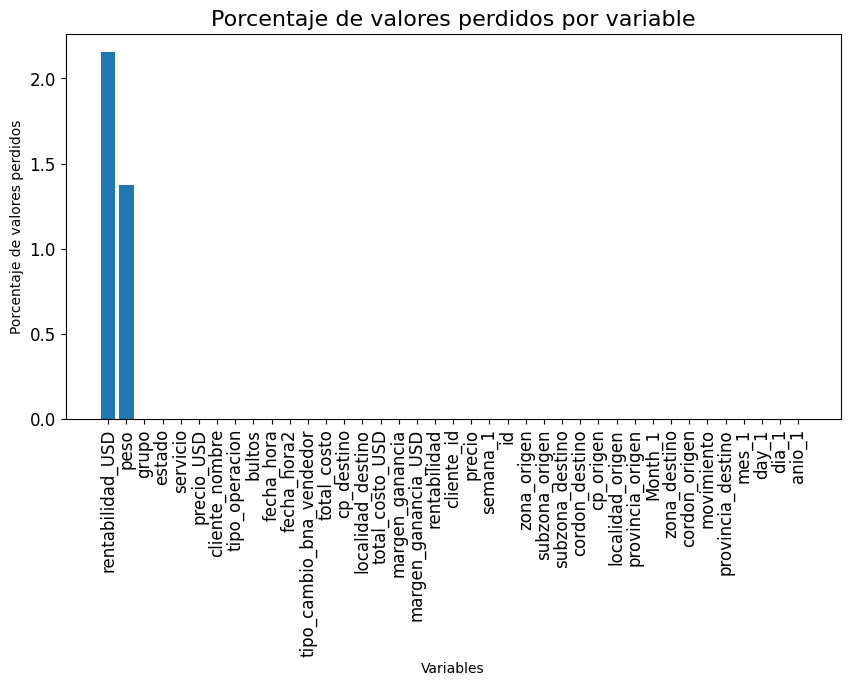

In [24]:
#Graficamos el % de nulos
fig, ax = plt.subplots(figsize=(10,5))
valores_perdidos_sorted = valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False)
ax.bar(valores_perdidos_sorted.index, valores_perdidos_sorted['Porcentaje_Missing'])
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores perdidos')
ax.set_title('Porcentaje de valores perdidos por variable', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

⭕ Después de analizar el porcentaje de valores faltantes en cada variable del DataFrame, podemos concluir que las variables **tipo_operacion** tienen el mayor porcentaje de valores faltantes, con el *24.9%*. Las variables **rentabilidad_USD** y **peso** tienen un porcentaje de valores faltantes del *2.5%* y *1.7%*, respectivamente. Además, **margen_ganancia_USD** y **precio_USD** tienen un porcentaje de valores faltantes del *0.4%*.

Decisión: Teniendo en cuenta que nuestro analisis se enfocara principalmente en los ingresos en volumen y precio de venta los nulos detectados no afectan el analisis, normalizaremos los tipos de operaciones a 5 categorias: **'ENTREGA PAQUETERIA'**, **'ENTREGA POSTAL'**, **'ENTREGA BOLSIN'**, **'RETIRO'**, **'RECUPERO'**

In [25]:
df_3['tipo_operacion'] = df_3['tipo_operacion'].fillna('ENTREGA PAQUETERIA')
df_3['tipo_operacion'] = df_3['tipo_operacion'].replace(['ENTREGA PAQUETERIA', 'ENTREGA', 'PRUEBA NO PROCESAR'], 'ENTREGA PAQUETERIA')
df_3['tipo_operacion'] = df_3['tipo_operacion'].replace(['RETIRO DE TERMINALES', 'RETIRO', 'RETIRO BOLSIN','ORIGEN'], 'RETIRO')

### ⏩ **7. <u>Exploratory Data Analysis - Visualizando Distribuciones</u>** 

#### 🔦 **7.1 Tipo de operaciones y movimientos**

**Objetivo**: Analizar el volumen y la distribución de los envíos según el cliente, la zona destino, la provincia y el tiempo.

**Preguntas**:
*¿Qué clientes tienen el mayor y el menor número de envíos y bultos?
¿Qué zonas y provincias tienen el mayor y el menor número de envíos y bultos?
¿Cómo varía el número de envíos y bultos según el año, el mes, la semana y el día de la semana?*

In [26]:
fecha_min = df_3['fecha_hora'].min()
fecha_max = df_3['fecha_hora'].max()
print(f'El DataFrame df_3 va desde el {fecha_min} hasta el {fecha_max}.')

El DataFrame df_3 va desde el 2020-01-01 08:54:38 hasta el 2022-12-31 21:16:17.


In [27]:
# Crear una nueva columna llamada "fecha" en el DataFrame "df_3" concatenando las columnas "anio_1" y "Month_1"
df_3['fecha'] = pd.to_datetime(df_3['anio_1'].astype(str) + '-' + df_3['mes_1'].astype(str) + '-1')

# Analizar las variaciones de envíos y bultos a lo largo del año 
enviobulto = df_3.groupby(['zona_destino', 'fecha']).agg({'id':'count', 'bultos':'sum'}).reset_index()

# Obtener las zonas de destino únicas
zd = enviobulto['zona_destino'].unique()


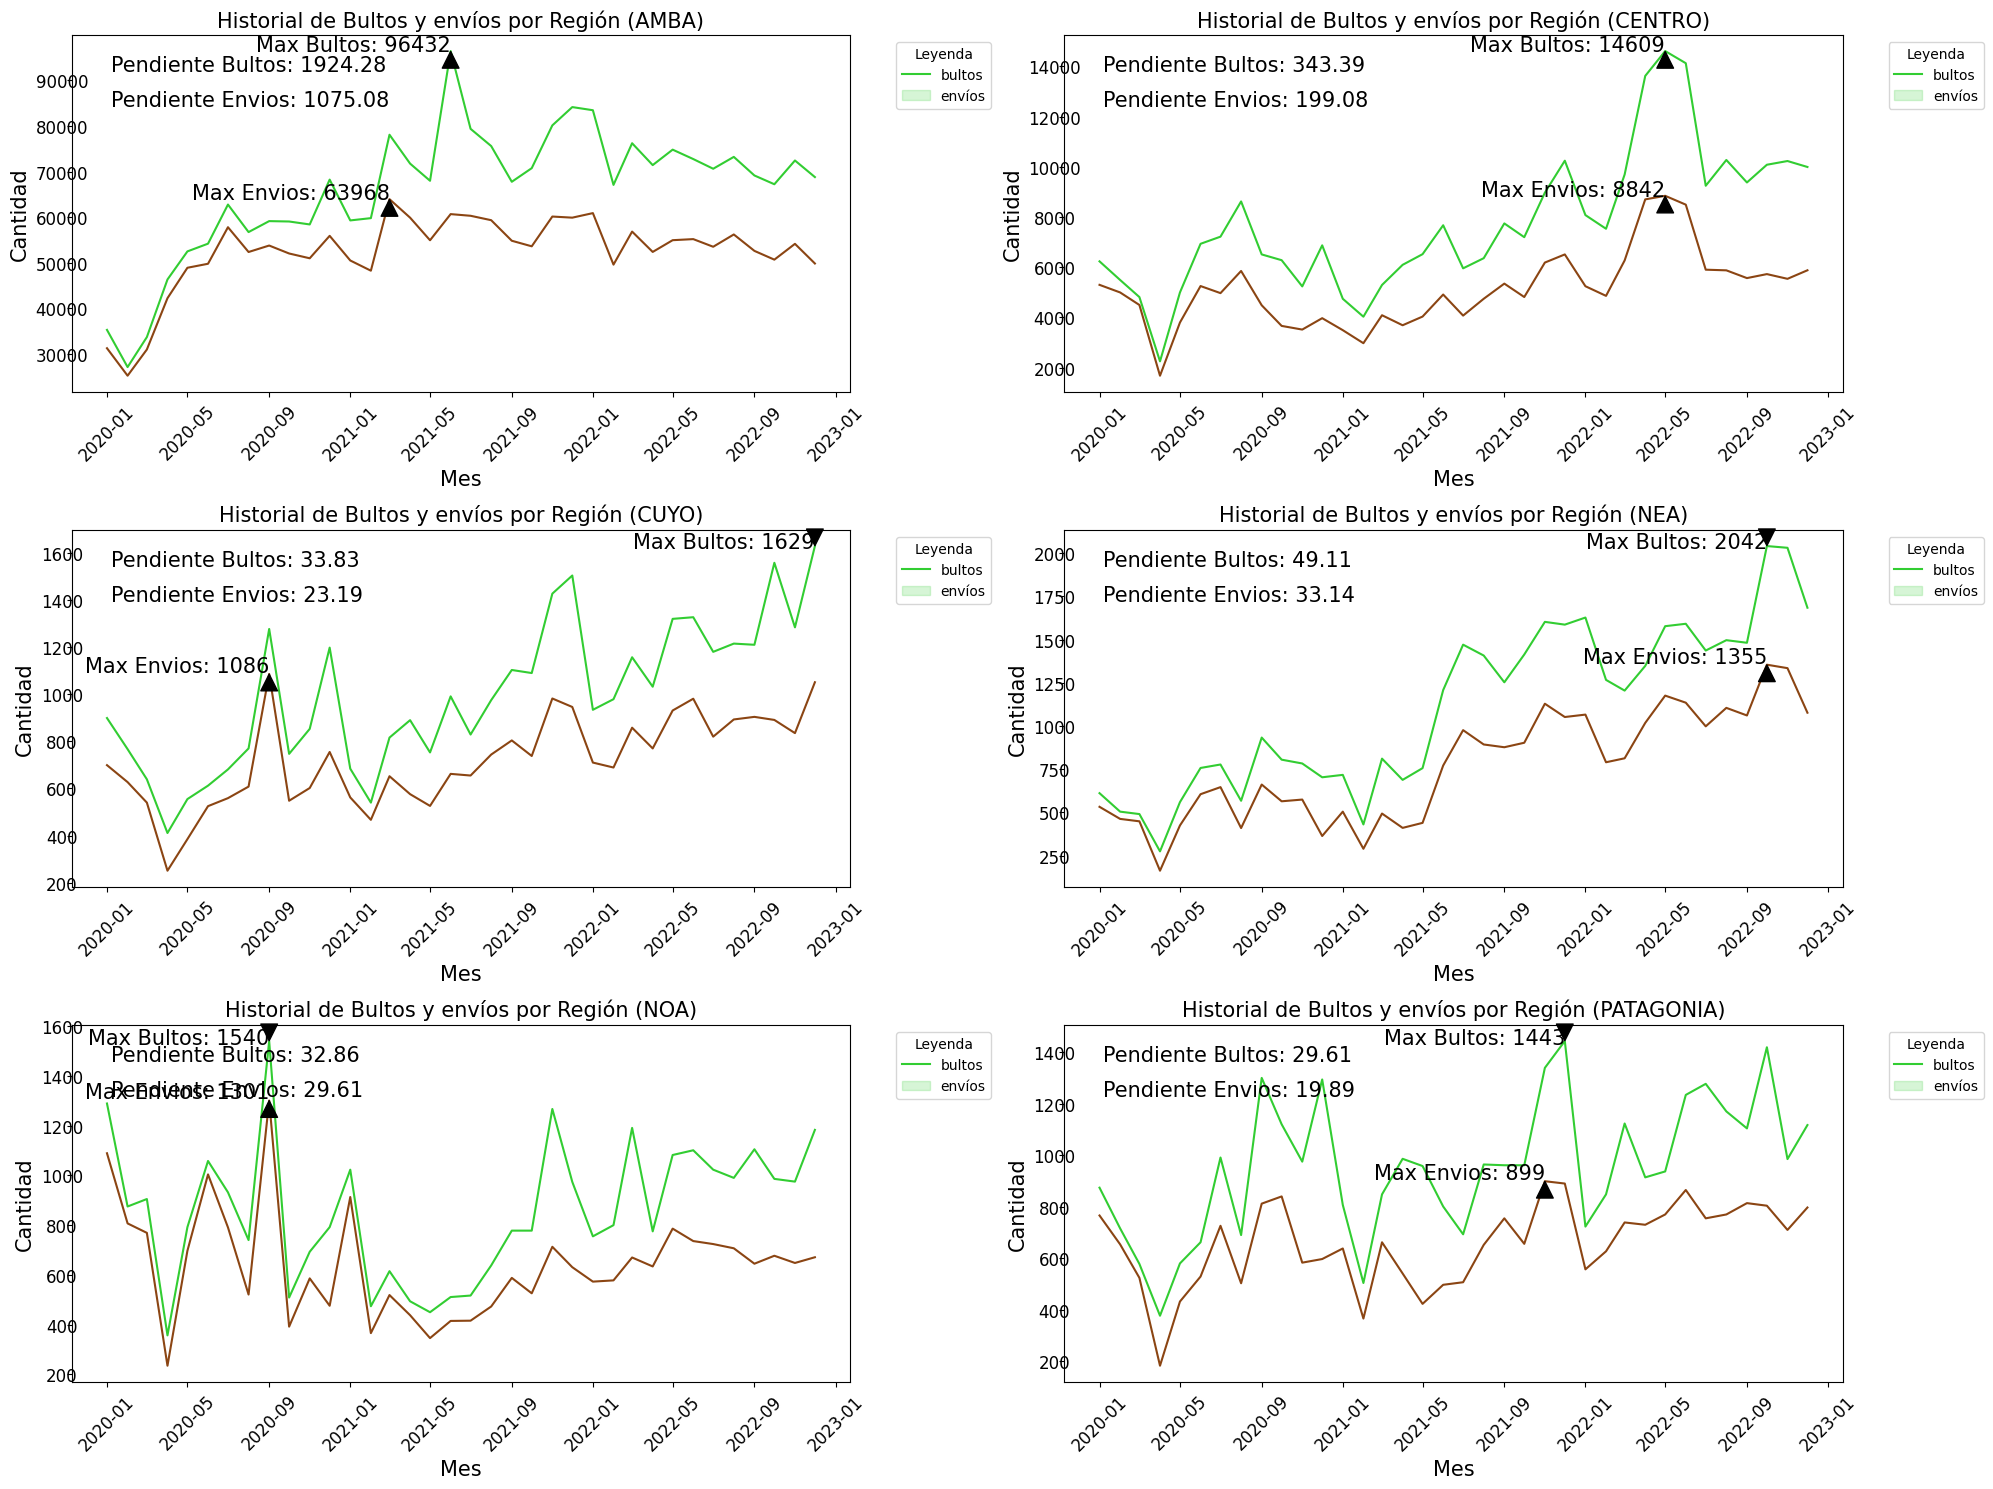

In [28]:
# Crear subgráficos para cada zona_destino
plt.rcParams['figure.facecolor'] = 'white'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))



# Definir una lista de colores para el eje hue
colors_bultos = ['#32CD32', '#32CD32', '#32CD32', '#32CD32','#32CD32','#32CD32']
colors_envios = ['#8B4513', '#8B4513', '#8B4513', '#8B4513','#8B4513','#8B4513']



# Graficar los subgráficos
for i, zona in enumerate(zd):
    row = i // 2
    col = i % 2
    sns.lineplot(data=enviobulto[enviobulto['zona_destino'] == zona], x="fecha", y="bultos", hue="zona_destino", palette=[colors_bultos[i]], ax=axs[row, col], label="bultos")
    sns.lineplot(data=enviobulto[enviobulto['zona_destino'] == zona], x="fecha", y="id", hue="zona_destino", palette=[colors_envios[i]], ax=axs[row, col], label="envíos")
    
    # Encontrar el punto máximo para bultos y envíos y añadir la anotación
    max_bultos = enviobulto[enviobulto['zona_destino'] == zona]['bultos'].max()
    min_bultos = enviobulto[enviobulto['zona_destino'] == zona]['bultos'].min()
    max_envios = enviobulto[enviobulto['zona_destino'] == zona]['id'].max()
    min_envios = enviobulto[enviobulto['zona_destino'] == zona]['id'].min()
    pendiente1 = (max_bultos - min_bultos) / len(enviobulto[enviobulto['zona_destino'] == zona])
    pendiente2 = (max_envios - min_envios) / len(enviobulto[enviobulto['zona_destino'] == zona])
    
    axs[row, col].annotate(f'Max Bultos: {max_bultos}', 
                           xy=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['bultos'].idxmax()], max_bultos), 
                           xytext=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['bultos'].idxmax()], max_bultos-10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=0.1))
    
    axs[row, col].annotate(f'Max Envios: {max_envios}', 
                           xy=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['id'].idxmax()], max_envios), 
                           xytext=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['id'].idxmax()], max_envios+10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=0.1))
    
    axs[row, col].set_title(f"Historial de Bultos y envíos por Región ({zona})",fontsize=15)
    axs[row, col].set_xlabel("Mes",fontsize=15)
    axs[row, col].set_ylabel("Cantidad",fontsize=15)
    axs[row, col].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1), labels=["bultos", "envíos"])
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45, ha='center', fontsize=12)
    axs[row, col].set_yticklabels(axs[row, col].get_yticklabels(),  ha='center', fontsize=12)
    axs[row, col].text(0.05, 0.9, f"Pendiente Bultos: {pendiente1:.2f}", transform=axs[row, col].transAxes, fontsize=15)
    axs[row, col].text(0.05, 0.8, f"Pendiente Envios: {pendiente2:.2f}", transform=axs[row, col].transAxes, fontsize=15)

# Ajustar el espacio entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()

⭕ Podemos concluir que, en términos generales, la región de **AMBA** tiene un historial más fuerte en el envío y manejo de bultos en comparación con las otras regiones. La pendiente de la línea de regresión para los envíos y bultos es más pronunciada en **AMBA** en comparación con las otras regiones, lo que significa que su tasa de crecimiento es mayor.

Por otro lado, las regiones de **CENTRO**, **CUYO**, **NEA**, **NOA** y **PATAGONIA** tienen una tasa de crecimiento relativamente baja en comparación con **AMBA**. La pendiente de la línea de regresión para estas regiones es menos pronunciada, lo que indica que su tasa de crecimiento es menor que en **AMBA**.

**AMBA** es la región más importante en términos de envío y manejo de bultos, mientras que las otras regiones tienen un crecimiento más lento. 

In [29]:
#Analizamos  la variaciones de envios y bultos a lo largo del año 
enviobulto1 = df_3.groupby(['movimiento', 'fecha']).agg({'id':'count', 'bultos':'sum'}).reset_index()

#Obtengo las zonas de destino únicas
mov = enviobulto1['movimiento'].unique()

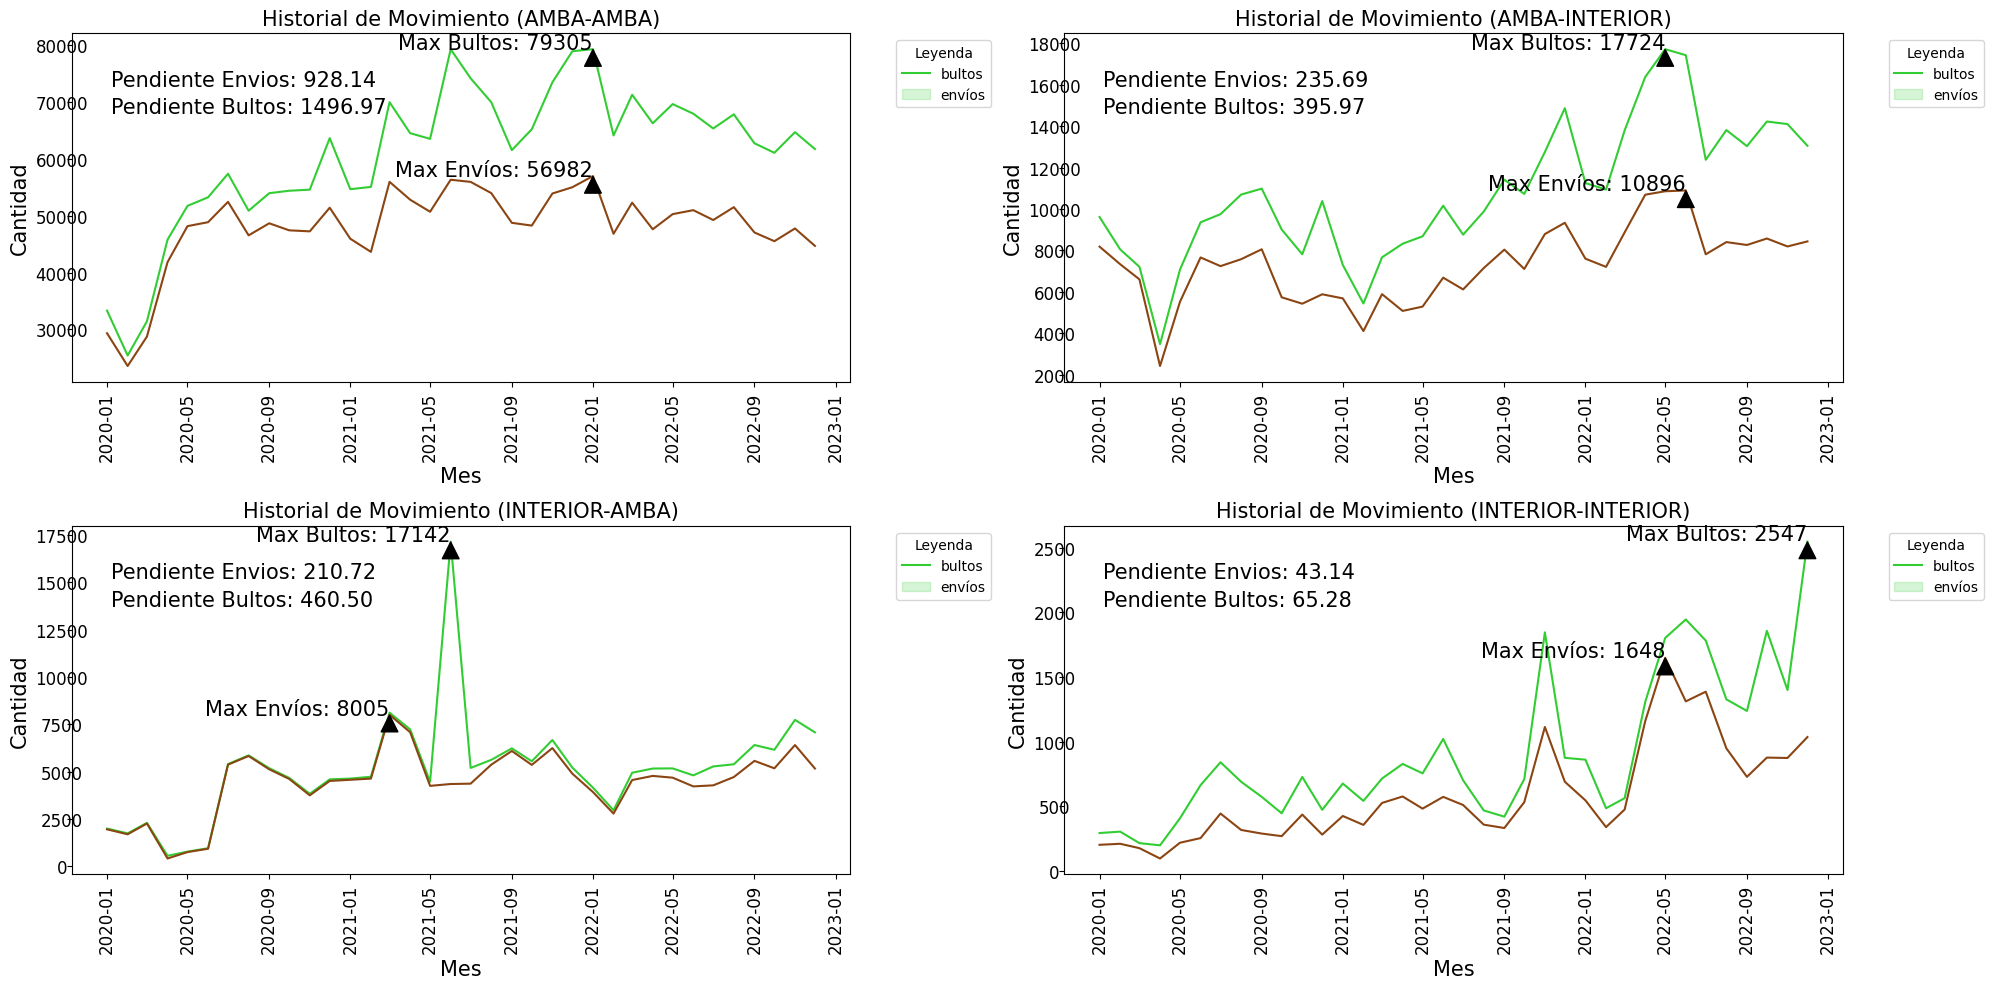

In [30]:
# Crear subgráficos para cada movimiento
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Definir una lista de colores para el eje hue
colors_bultos = ['#32CD32', '#32CD32', '#32CD32', '#32CD32']
colors_envios = ['#8B4513', '#8B4513', '#8B4513', '#8B4513']


# Graficar los subgráficos
for i, zona in enumerate(mov):
    row = i // 2
    col = i % 2
    sns.lineplot(data=enviobulto1[enviobulto1['movimiento'] == zona], x="fecha", y="bultos", hue="movimiento", palette=[colors_bultos[i]], ax=axs[row, col], label="bultos")
    sns.lineplot(data=enviobulto1[enviobulto1['movimiento'] == zona], x="fecha", y="id", hue="movimiento", palette=[colors_envios[i]], ax=axs[row, col], label="envíos")
    
    # Encontrar el punto máximo para bultos y envíos y añadir la anotación
    max_bultos = enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].max()
    min_bultos = enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].min()
    max_envios = enviobulto1[enviobulto1['movimiento'] == zona]['id'].max()
    min_envios = enviobulto1[enviobulto1['movimiento'] == zona]['id'].min()
    pendiente1 = (max_bultos - min_bultos) / len(enviobulto1[enviobulto1['movimiento'] == zona])
    pendiente2 = (max_envios - min_envios) / len(enviobulto1[enviobulto1['movimiento'] == zona])
    
    
    axs[row, col].annotate(f'Max Bultos: {max_bultos}', 
                           xy=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].idxmax()], max_bultos), 
                           xytext=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].idxmax()], max_bultos+10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=0.1))
    
    axs[row, col].annotate(f'Max Envíos: {max_envios}', 
                           xy=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['id'].idxmax()], max_envios), 
                           xytext=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['id'].idxmax()], max_envios+10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=0.1))
    
    axs[row, col].set_title(f"Historial de Movimiento ({zona})",fontsize=15)
    axs[row, col].set_xlabel("Mes",fontsize=15)
    axs[row, col].set_ylabel("Cantidad",fontsize=15)
    axs[row, col].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1), labels=["bultos", "envíos"])
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=90, ha='center', fontsize=12)
    axs[row, col].set_yticklabels(axs[row, col].get_yticklabels(),  ha='center', fontsize=12)
    axs[row, col].text(0.05, 0.77, f"Pendiente Bultos: {pendiente1:.2f}", transform=axs[row, col].transAxes,fontsize=15)
    axs[row, col].text(0.05, 0.85, f"Pendiente Envios: {pendiente2:.2f}", transform=axs[row, col].transAxes,fontsize=15)

# Ajustar el espacio entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()

⭕ En base a las pendientes proporcionadas, podemos concluir que la región con mayor cantidad de envíos y bultos es **AMBA-AMBA**, lo que indica que hay una gran cantidad de movimientos dentro de esta región. La región **AMBA-INTERIOR** muestra una cantidad considerablemente menor de envíos y bultos, lo que sugiere que los movimientos interregionales no son tan frecuentes. La región **INTERIOR-AMBA** tiene pendientes similares a **AMBA-INTERIOR**, lo que sugiere que el movimiento de bienes desde el interior hacia AMBA y viceversa es relativamente equilibrado. La región **INTERIOR-INTERIOR** tiene las pendientes más bajas, lo que indica que hay una cantidad menor de movimientos entre las regiones interiores.

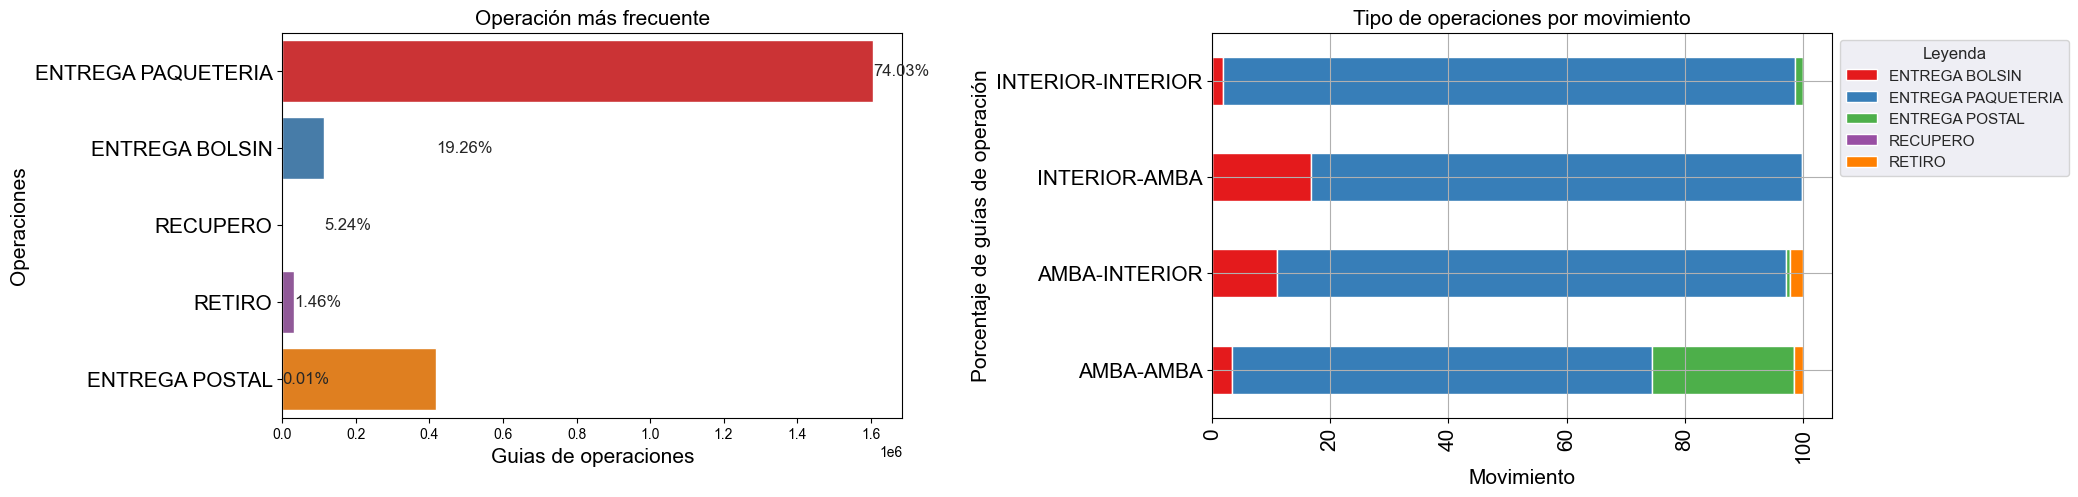

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5),gridspec_kw={'wspace': 0.5})

op = df_3["tipo_operacion"]
sns.set(font_scale=1)


#Agrego los valores porcentuales de la variable tipo_operacion
for n,i in enumerate(['ENTREGA PAQUETERIA', 'ENTREGA POSTAL', 'ENTREGA BOLSIN', 'RETIRO', 'RECUPERO']):
  porc = df_3["tipo_operacion"].value_counts(normalize=True)[i]*100
  axes[0].text(df_3["tipo_operacion"].value_counts(normalize=False).round(2)[i], n, porc.round(2).astype(str)+'%', va="center", fontsize=12)

sns.countplot(y=op, ax=axes[0], palette='Set1')
axes[0].set_title("Operación más frecuente", fontsize=15)
axes[0].set_xlabel("Guias de operaciones", fontsize=15)
axes[0].set_ylabel("Operaciones", fontsize=15)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha='right', fontsize=15)

mov_op= df_3.groupby(["movimiento","tipo_operacion"]).agg({"id":'count'})
mov  =  mov_op.unstack()

mov_op_pct = mov_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
mov_op_pct = mov_op_pct.round(2)

mov_op_pct = mov_op_pct.unstack(level=1)
mov_op_pct.columns = mov_op_pct.columns.droplevel()

ax1 = mov_op_pct.plot(kind='barh', stacked=True, ax=axes[1], fontsize=15, color=sns.color_palette('Set1'))
ax1.set_xlabel('Movimiento', fontsize=15)
ax1.set_ylabel('Porcentaje de guías de operación', fontsize=15)
ax1.set_title('Tipo de operaciones por movimiento', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=15)
ax1.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))


plt.show()


⭕ La operación más frecuente en el servicio postal es la entrega de paqueteria. Esta información puede ser útil para planificar mejor la asignación de recursos y mejorar la eficiencia operativa.

Se ha analizado la distribución de los tipos de operaciones por movimiento, lo que puede ayudar a comprender cómo se realizan las diferentes operaciones en el servicio postal y cómo se relacionan con los diferentes movimientos de envío y recepción.

El gráfico de barras apiladas en el segundo eje muestra la distribución de los diferentes tipos de operaciones por movimiento en términos de porcentaje. Este gráfico permite comparar fácilmente la proporción de cada tipo de operación en cada movimiento, lo que puede ayudar a identificar patrones y tendencias.

En conclucion podemos comprender que el fuerte son el envio de paqueteria desde el AMBA al Interior del pais, no asi es el caso inverso.

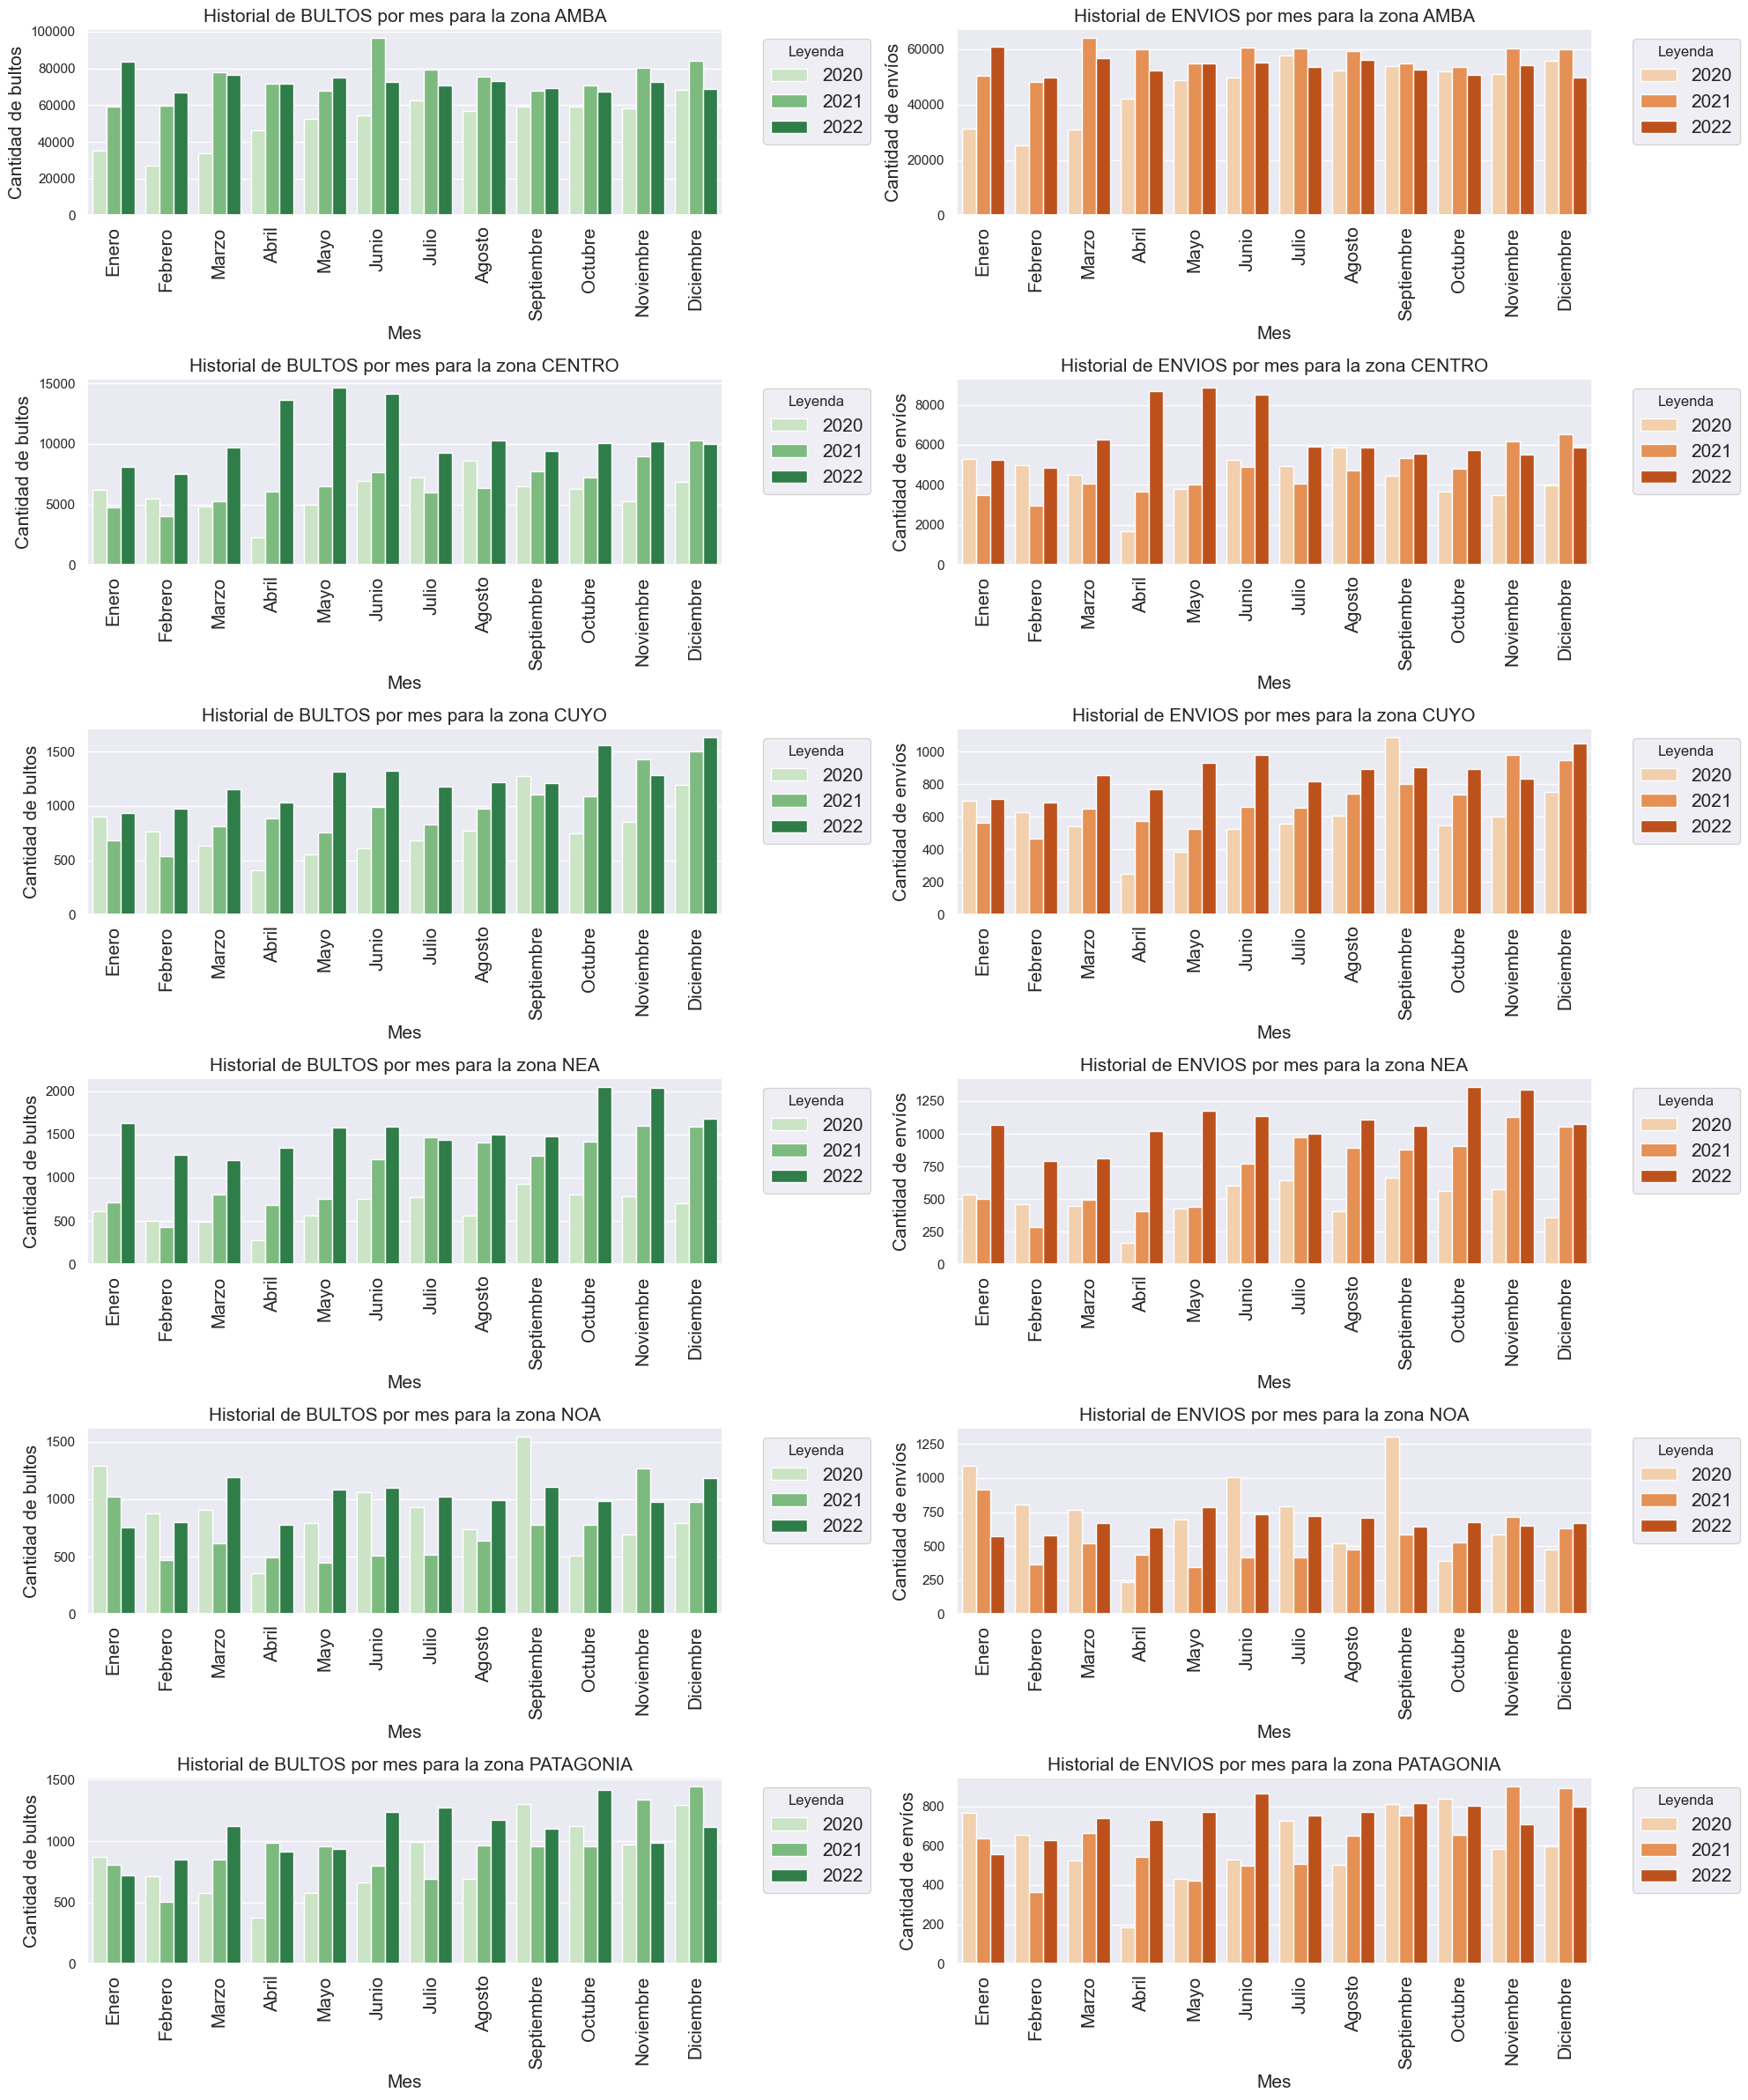

Los meses más destacados para la zona AMBA son:
- Bultos: Junio
- Envíos: Marzo

Los meses más destacados para la zona CENTRO son:
- Bultos: Mayo
- Envíos: Mayo

Los meses más destacados para la zona CUYO son:
- Bultos: Diciembre
- Envíos: Septiembre

Los meses más destacados para la zona NEA son:
- Bultos: Octubre
- Envíos: Octubre

Los meses más destacados para la zona NOA son:
- Bultos: Septiembre
- Envíos: Septiembre

Los meses más destacados para la zona PATAGONIA son:
- Bultos: Diciembre
- Envíos: Noviembre



In [32]:
# Agrupar por zona_destino, año y mes
enviobulto2 = df_3.groupby(['zona_destino', 'anio_1', 'mes_1']).agg({'bultos':'sum', 'id':'count'}).reset_index()



# Crear una columna con el nombre del mes
dict_meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}
enviobulto2['nombre_mes'] = enviobulto2['mes_1'].apply(lambda x: dict_meses[x])

# Ordenar por año y mes
enviobulto2 = enviobulto2.sort_values(['anio_1', 'mes_1'])

# Obtener las zonas únicas
zonas = enviobulto2['zona_destino'].unique()

# Crear una figura con subplots para cada zona
fig, axs = plt.subplots(nrows=len(zonas), ncols=2, figsize=(20, 4*len(zonas)))

# Recorrer cada zona y crear los gráficos correspondientes en cada subplot
for i, zona in enumerate(zonas):
    data = enviobulto2[enviobulto2['zona_destino'] == zona]
    
    # Crear un gráfico de barras para bultos
    sns.barplot(x='nombre_mes', y='bultos', hue='anio_1', data=data, ax=axs[i][0], palette='Greens')
    axs[i][0].set_title(f"Historial de BULTOS por mes para la zona {zona}",fontsize=15)
    axs[i][0].set_xlabel('Mes',fontsize=15)
    axs[i][0].set_ylabel('Cantidad de bultos',fontsize=15)
    axs[i][0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1),fontsize=15)
    axs[i][0].set_xticklabels(axs[i][0].get_xticklabels(), rotation=90, ha='center', fontsize=15)

    # Crear un gráfico de barras para envíos
    sns.barplot(x='nombre_mes', y='id', hue='anio_1', data=data, ax=axs[i][1],palette='Oranges')
    axs[i][1].set_title(f"Historial de ENVIOS por mes para la zona {zona}",fontsize=15)
    axs[i][1].set_xlabel('Mes',fontsize=15)
    axs[i][1].set_ylabel('Cantidad de envíos',fontsize=15)
    axs[i][1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1),fontsize=15)
    axs[i][1].set_xticklabels(axs[i][0].get_xticklabels(), rotation=90, ha='center', fontsize=15)

# Ajustar los subplots y mostrar la figura
fig.tight_layout()
plt.show()

# Obtener los meses más destacados por zona de destino
for zona in zonas:
    data = enviobulto2[enviobulto2['zona_destino'] == zona]
    bultos_max = data.loc[data['bultos'].idxmax(), 'nombre_mes']
    envios_max = data.loc[data['id'].idxmax(), 'nombre_mes']
    print(f"Los meses más destacados para la zona {zona} son:\n- Bultos: {bultos_max}\n- Envíos: {envios_max}\n")



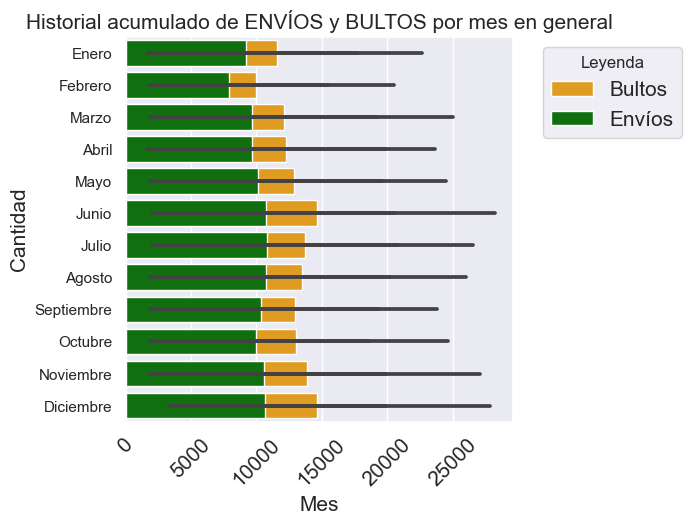

In [33]:
# Creo gráfico de barras acumulado para envíos y bultos
plt.figure(figsize=(5, 5))
sns.barplot(x='bultos', y='nombre_mes', color='orange', label='Bultos', data=enviobulto2)
sns.barplot(x='id', y='nombre_mes', color='green', label='Envíos', data=enviobulto2)

plt.title("Historial acumulado de ENVÍOS y BULTOS por mes en general", fontsize=15)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=15)
plt.xticks(rotation=45, ha='center', fontsize=15)
plt.show()


En esta gráfica, podemos comparar la cantidad de envíos y bultos por mes. La información se muestra
segmentada por Region y se compara con el mismo mes de los años 2020-2021-2022. Se utilizaron dos gráficos de barras, uno para envíos y otro para bultos

⭕En este conjunto de gráficos podemos visualizar la distribución de precios, costos y márgenes de ganancia en dólares (moneda dura) y en pesos argentinos (moneda volatil), así como también la cantidad de envíos y bultos por mes y año.

En cuanto a la distribución de precios, se puede observar que el precio en pesos argentinos tiene un comportamiento positivo en alza, mayor cantidad de bultos mayor ingreso. Pero no obstante el precio en dólares muestra una tendencia a la baja a lo largo del tiempo si lo comparamos con la cantidad de envios y bultos que ingresaron. Lo mismo pasa con los costos en dólares y en pesos tienen una tendencia creciente a lo largo del tiempo, mientras que los márgenes de ganancia en dólares y en pesos tienen una tendencia a la baja. 

Podemos concluir que hay un estancamiento o desactualizacion en las listas de precios. 

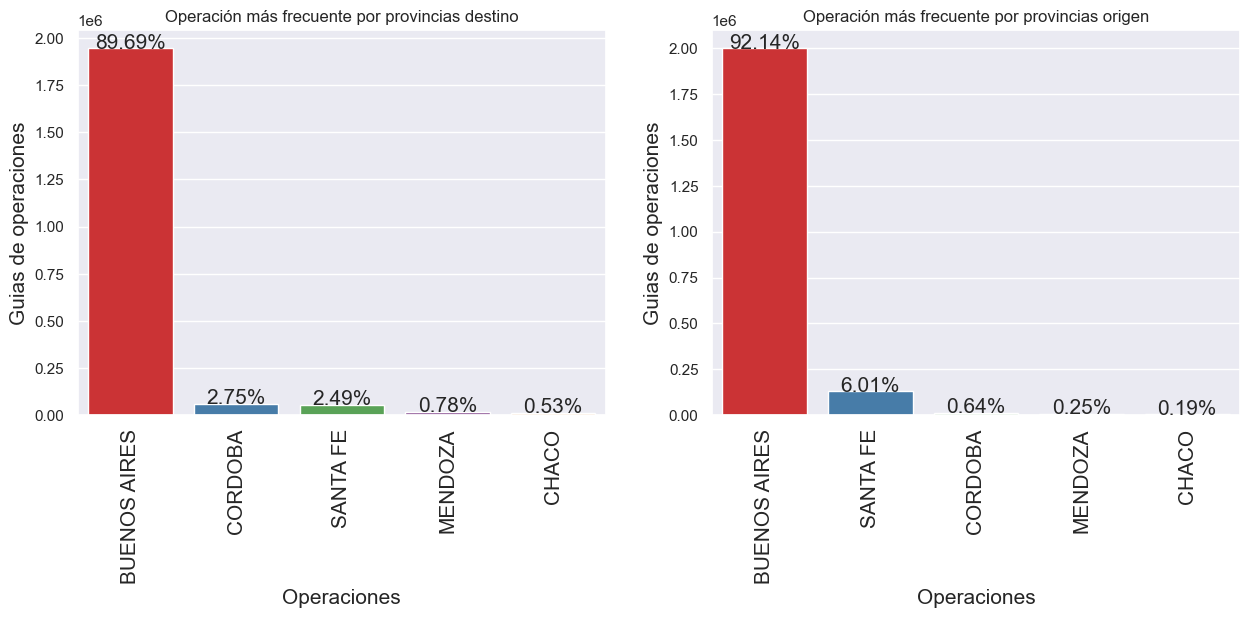

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), gridspec_kw={'hspace': .5})

prov_op_d = df_3["provincia_destino"]
prov_op_o = df_3["provincia_origen"]
sns.set(font_scale=1)

sns.countplot(x=prov_op_d, ax=axes[0], palette='Set1', order=prov_op_d.value_counts().head(5).index)
axes[0].set_title("Operación más frecuente por provincias destino", fontsize=12)
axes[0].set_xlabel("Operaciones", fontsize=15)
axes[0].set_ylabel("Guias de operaciones", fontsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='center', fontsize=15)

sns.countplot(x=prov_op_o, ax=axes[1], palette='Set1',order=prov_op_o.value_counts().head(5).index)
axes[1].set_title("Operación más frecuente por provincias origen", fontsize=12)
axes[1].set_xlabel("Operaciones", fontsize=15)
axes[1].set_ylabel("Guias de operaciones", fontsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center', fontsize=15)

# Función para agregar etiquetas con porcentajes
def AutoLabelCountPlot(ax, df):
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{0:.2f}%'.format(100 * height / total),
                ha="center", fontsize=15)

AutoLabelCountPlot(axes[0], prov_op_d)
AutoLabelCountPlot(axes[1], prov_op_o)

prov_d_op= df_3.groupby(["provincia_destino","provincia_origen"]).agg({"id":'count'})
prov_d  =  prov_d_op.unstack()

prov_d_op_pct = prov_d_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
prov_d_op_pct = prov_d_op_pct.round(2)
prov_d_op_pct = prov_d_op_pct.unstack(level=1)
prov_d_op_pct.columns = prov_d_op_pct.columns.droplevel()

plt.show()

⭕La mayoría de las operaciones tienen como destino (89.83%) y origen (92.34%) la provincia de Buenos Aires. Las operaciones con destino a Cordoba son del 2.72% mientras que esta provincia genera envios por solo el 0.63%. Santa Fe es el destino del 2.44% de las operaciones y nacen de dicha provincia el 5.84%. Por lo tanto las 2 provincias con mayor caudal y generacion de actividad son Buenos Aires y Santa Fe.

#### 🔦 **7.2 Clientes - Precio - Margen de ganancia**

Al analizar el precio, costo y margen de ganancia en logística se puede lograr una mejor comprensión y control de los costos y rentabilidad en la cadena de suministro. Al conocer estos factores, es posible identificar oportunidades para reducir costos, mejorar la eficiencia operativa y aumentar la rentabilidad.

**Objetivo**: Analizar la rentabilidad de los envíos según el precio, el costo, el margen y la zona destino.

**Preguntas**:
*¿Qué zonas tienen el mayor y el menor precio, costo, margen y rentabilidad por envío?
¿Cómo se relaciona el precio, el costo, el margen y la rentabilidad con el peso, los bultos o el tipo de servicio?
¿Qué factores influyen en la rentabilidad de los envíos?
¿Qué estrategias se pueden implementar para mejorar la rentabilidad de los envíos?*

In [170]:
df_3.head()

,id,cliente_id,cliente_nombre,servicio,tipo_operacion,bultos,peso,grupo,estado,fecha_hora,fecha_hora2,tipo_cambio_bna_vendedor,precio,precio_USD,total_costo,total_costo_USD,margen_ganancia,margen_ganancia_USD,rentabilidad,rentabilidad_USD,cp_destino,localidad_destino,provincia_destino,zona_destino,subzona_destino,cordon_destino,cp_origen,localidad_origen,provincia_origen,zona_origen,subzona_origen,cordon_origen,movimiento,Month_1,mes_1,day_1,dia_1,semana_1,anio_1,fecha,clasificacion del cliente
0,398567,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,3.00,DEVOLUCION,2DAV-2 VISITA SIN CONTACTO ALGUNO,2020-01-03 10:55:58,2020-01-03,63.0,555.0,8.809524,70.0,1.111111,485.0,7.698413,0.873874,0.873874,1611,DON TORCUATO,BUENOS AIRES,AMBA,GBA,3,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
1,416738,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,3.00,ENTREGADA,POD-ENTREGADA,2020-01-03 08:51:37,2020-01-03,63.0,555.0,8.809524,70.0,1.111111,485.0,7.698413,0.873874,0.873874,1888,FLORENCIO VARELA,BUENOS AIRES,AMBA,GBA,3,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
2,416708,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,3.25,ENTREGADA,POD-ENTREGADA,2020-01-03 08:10:18,2020-01-03,63.0,555.0,8.809524,70.0,1.111111,485.0,7.698413,0.873874,0.873874,1801,EZEIZA,BUENOS AIRES,AMBA,GBA,3,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
3,416709,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,6.00,DEVOLUCION,DEVME-DEVOLUCION DE MERCADERIA AL CLIENTE,2020-01-03 08:11:45,2020-01-03,63.0,645.0,10.238095,70.0,1.111111,575.0,9.126984,0.891473,0.891473,1706,HAEDO,BUENOS AIRES,AMBA,GBA,2,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
4,416710,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,6.00,DEVOLUCION,SPROD-NO TIENE PRODUCTO,2020-01-03 08:12:58,2020-01-03,63.0,645.0,10.238095,70.0,1.111111,575.0,9.126984,0.891473,0.891473,1824,LANUS,BUENOS AIRES,AMBA,GBA,2,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno


In [156]:
df_3a=df_3[['anio_1', 'mes_1', 'cliente_id','margen_ganancia_USD','id']]

In [157]:
promedios = df_3a.groupby(['cliente_id','anio_1', 'mes_1']).agg({'margen_ganancia_USD': 'sum', 'id': 'count'}).reset_index().round(2)
promedios.rename(columns={'id': 'cantidad_envios'}, inplace=True)

promedios2 = promedios.groupby(['anio_1', 'mes_1']).agg({'margen_ganancia_USD': 'mean', 'cantidad_envios': 'mean'}).reset_index().round(2)


In [159]:
def asignar_clasificacion(margen, envios, promedios):
    margen_promedio = promedios.loc[(promedios['anio_1'] == promedios['anio_1'].max()) & (promedios['mes_1'] == promedios['mes_1'].max()), 'margen_ganancia_USD'].values[0]
    envios_promedio = promedios.loc[(promedios['anio_1'] == promedios['anio_1'].max()) & (promedios['mes_1'] == promedios['mes_1'].max()), 'cantidad_envios'].values[0]
    margen_threshold = 0.9  # Porcentaje sobre el promedio (90%)
    envios_threshold = 1.1  # Porcentaje por debajo del promedio (110%)

    if margen >= margen_promedio * margen_threshold:
        if envios >= envios_promedio * envios_threshold:
            return 'Excelente'
        else:
            return 'Muy bueno'
    else:
        if envios >= envios_promedio * envios_threshold:
            return 'Bueno'
        else:
            if margen < margen_promedio * (1 - margen_threshold) and envios < envios_promedio * (1 - envios_threshold):
                return 'Pesimo'
            else:
                return 'Malo'

promedios['clasificacion del cliente'] = promedios.apply(lambda row: asignar_clasificacion(row['margen_ganancia_USD'], row['cantidad_envios'], promedios2), axis=1)


In [168]:
df_3 = df_3.merge(promedios[['cliente_id', 'anio_1', 'mes_1', 'clasificacion del cliente']], on=['cliente_id', 'anio_1', 'mes_1'], how='left')


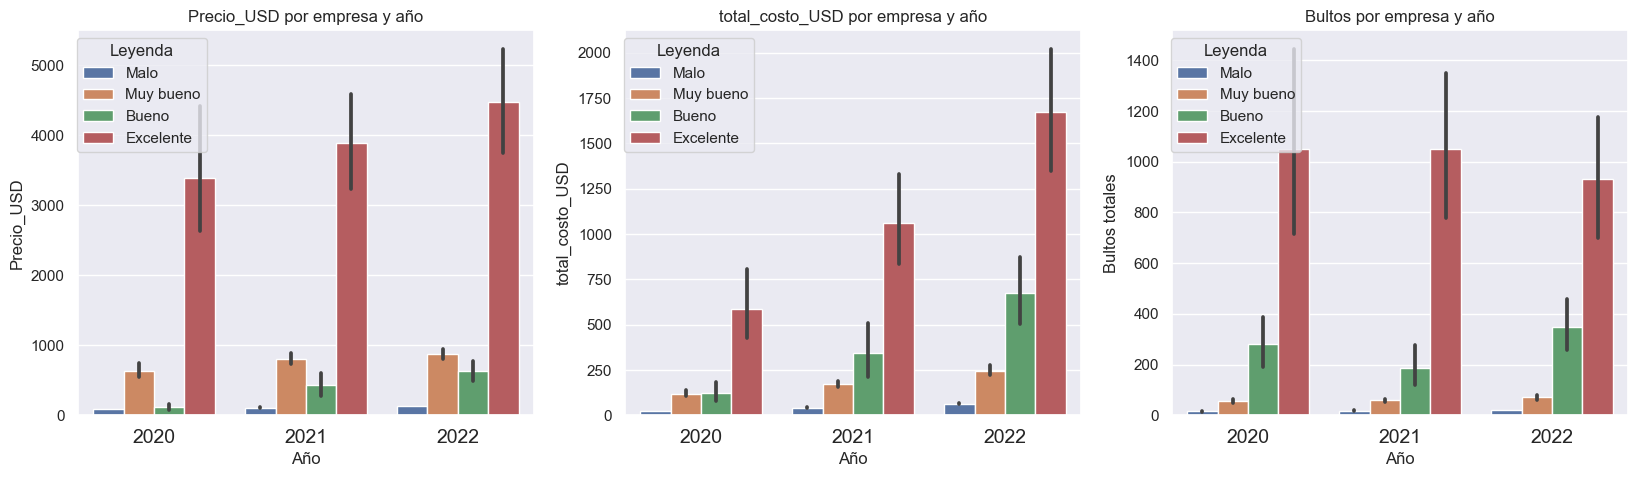

De un total de 402 empresas, 194 son consideradas buenas.
De un total de 402 empresas, 190 tienen un gran costo.
De un total de 402 empresas, 195 tienen una alta cantidad bultos.
El porcentaje de la facturación total que corresponde a las, 194 empresas buenas es: 92.76428327459142 %


In [171]:
# calcular ventas totales por empresa y mes
group_empresa= df_3.groupby(['zona_destino','cliente_nombre', 'fecha','anio_1','mes_1','clasificacion del cliente']).agg({'precio_USD':'sum','total_costo_USD':'sum', 'bultos':'sum', 'id':'count'}).reset_index()

# calcular ventas totales por empresa y mes
#group_empresa= postal.groupby(['empresa', 'anio_1','semana_1'])['precio','margen_ganancia','id','bultos'].sum().reset_index()

# clasificar empresas en grupos según percentiles
group_empresa['percentil1'] = pd.qcut(group_empresa['precio_USD'], q=[0, 0.25, 0.75, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil2'] = pd.qcut(group_empresa['total_costo_USD'], q=[0, 0.25, 0.75, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil3'] = pd.qcut(group_empresa['bultos'], q=[0, 0.25, 0.75, 1.0], labels=['mala', 'estable', 'buena'])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5),gridspec_kw={'wspace': .2})
sns.barplot(data=group_empresa, x='anio_1', y='precio_USD', hue='clasificacion del cliente',ax=axs[0])
axs[0].set_title('Precio_USD por empresa y año')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Precio_USD')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(0.3, 1))
axs[0].set_xticklabels(axs[0].get_xticklabels(), ha='center', fontsize=14)

sns.barplot(data=group_empresa, x='anio_1', y='total_costo_USD', hue='clasificacion del cliente',ax=axs[1])
axs[1].set_title('total_costo_USD por empresa y año')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('total_costo_USD')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(0.3, 1))
axs[1].set_xticklabels(axs[1].get_xticklabels(), ha='center', fontsize=14)

sns.barplot(data=group_empresa, x='anio_1', y='bultos', hue='clasificacion del cliente',ax=axs[2])
axs[2].set_title('Bultos por empresa y año')
axs[2].set_xlabel('Año')
axs[2].set_ylabel('Bultos totales')
axs[2].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(0.3, 1))
axs[2].set_xticklabels(axs[2].get_xticklabels(), ha='center', fontsize=14)

plt.show()
total_empresas = group_empresa['cliente_nombre'].nunique()
buenas_empresas_g = group_empresa[group_empresa['percentil1'] == 'buena']['cliente_nombre'].nunique()
buenas_empresas_tc = group_empresa[group_empresa['percentil2'] == 'buena']['cliente_nombre'].nunique()
buenas_empresas_b = group_empresa[group_empresa['percentil3'] == 'buena']['cliente_nombre'].nunique()

# Calcular el porcentaje de facturación que corresponde a empresas buenas
empresas_buenas = group_empresa[group_empresa["percentil1"] == "buena"]
facturacion_empresas_buenas = empresas_buenas["precio_USD"].sum()
facturacion_total = group_empresa["precio_USD"].sum()
porcentaje_empresas_buenas = (facturacion_empresas_buenas / facturacion_total) * 100

print(f"De un total de {total_empresas} empresas, {buenas_empresas_g} son consideradas buenas.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_tc} tienen un gran costo.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_b} tienen una alta cantidad bultos.")
print(f"El porcentaje de la facturación total que corresponde a las, {buenas_empresas_g} empresas buenas es:", porcentaje_empresas_buenas, "%")

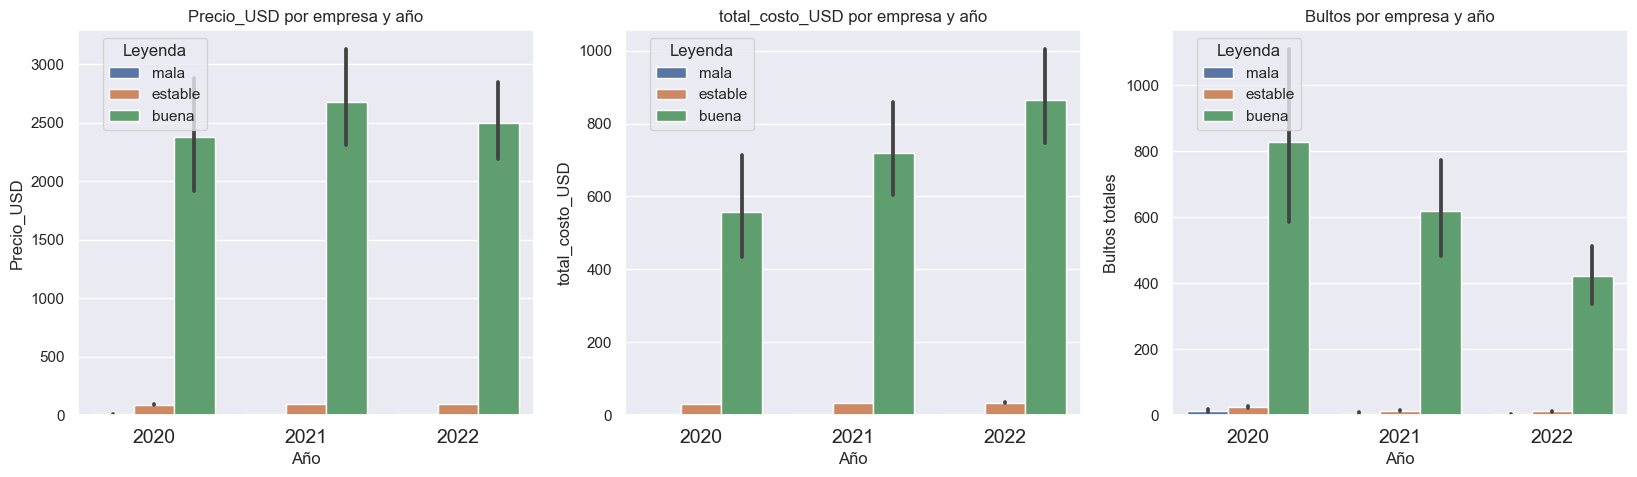

De un total de 402 empresas, 194 son consideradas buenas.
De un total de 402 empresas, 190 tienen un gran costo.
De un total de 402 empresas, 195 tienen una alta cantidad bultos.
El porcentaje de la facturación total que corresponde a las, 194 empresas buenas es: 92.76428327459142 %


In [172]:
# calcular ventas totales por empresa y mes
group_empresa= df_3.groupby(['zona_destino','cliente_nombre', 'fecha','anio_1','mes_1']).agg({'precio_USD':'sum','total_costo_USD':'sum', 'bultos':'sum', 'id':'count'}).reset_index()

# calcular ventas totales por empresa y mes
#group_empresa= postal.groupby(['empresa', 'anio_1','semana_1'])['precio','margen_ganancia','id','bultos'].sum().reset_index()

# clasificar empresas en grupos según percentiles
group_empresa['percentil1'] = pd.qcut(group_empresa['precio_USD'], q=[0, 0.25, 0.75, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil2'] = pd.qcut(group_empresa['total_costo_USD'], q=[0, 0.25, 0.75, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil3'] = pd.qcut(group_empresa['bultos'], q=[0, 0.25, 0.75, 1.0], labels=['mala', 'estable', 'buena'])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5),gridspec_kw={'wspace': .2})
sns.barplot(data=group_empresa, x='anio_1', y='precio_USD', hue='percentil1',ax=axs[0])
axs[0].set_title('Precio_USD por empresa y año')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Precio_USD')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(0.3, 1))
axs[0].set_xticklabels(axs[0].get_xticklabels(), ha='center', fontsize=14)

sns.barplot(data=group_empresa, x='anio_1', y='total_costo_USD', hue='percentil2',ax=axs[1])
axs[1].set_title('total_costo_USD por empresa y año')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('total_costo_USD')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(0.3, 1))
axs[1].set_xticklabels(axs[1].get_xticklabels(), ha='center', fontsize=14)

sns.barplot(data=group_empresa, x='anio_1', y='bultos', hue='percentil2',ax=axs[2])
axs[2].set_title('Bultos por empresa y año')
axs[2].set_xlabel('Año')
axs[2].set_ylabel('Bultos totales')
axs[2].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(0.3, 1))
axs[2].set_xticklabels(axs[2].get_xticklabels(), ha='center', fontsize=14)

plt.show()
total_empresas = group_empresa['cliente_nombre'].nunique()
buenas_empresas_g = group_empresa[group_empresa['percentil1'] == 'buena']['cliente_nombre'].nunique()
buenas_empresas_tc = group_empresa[group_empresa['percentil2'] == 'buena']['cliente_nombre'].nunique()
buenas_empresas_b = group_empresa[group_empresa['percentil3'] == 'buena']['cliente_nombre'].nunique()

# Calcular el porcentaje de facturación que corresponde a empresas buenas
empresas_buenas = group_empresa[group_empresa["percentil1"] == "buena"]
facturacion_empresas_buenas = empresas_buenas["precio_USD"].sum()
facturacion_total = group_empresa["precio_USD"].sum()
porcentaje_empresas_buenas = (facturacion_empresas_buenas / facturacion_total) * 100

print(f"De un total de {total_empresas} empresas, {buenas_empresas_g} son consideradas buenas.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_tc} tienen un gran costo.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_b} tienen una alta cantidad bultos.")
print(f"El porcentaje de la facturación total que corresponde a las, {buenas_empresas_g} empresas buenas es:", porcentaje_empresas_buenas, "%")

In [173]:
# clasificar empresas en grupos según percentiles
region_empresa=df_3
region_empresa['percentil1'] = pd.qcut(region_empresa['precio_USD'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])
region_empresa['percentil2'] = pd.qcut(region_empresa['margen_ganancia_USD'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])

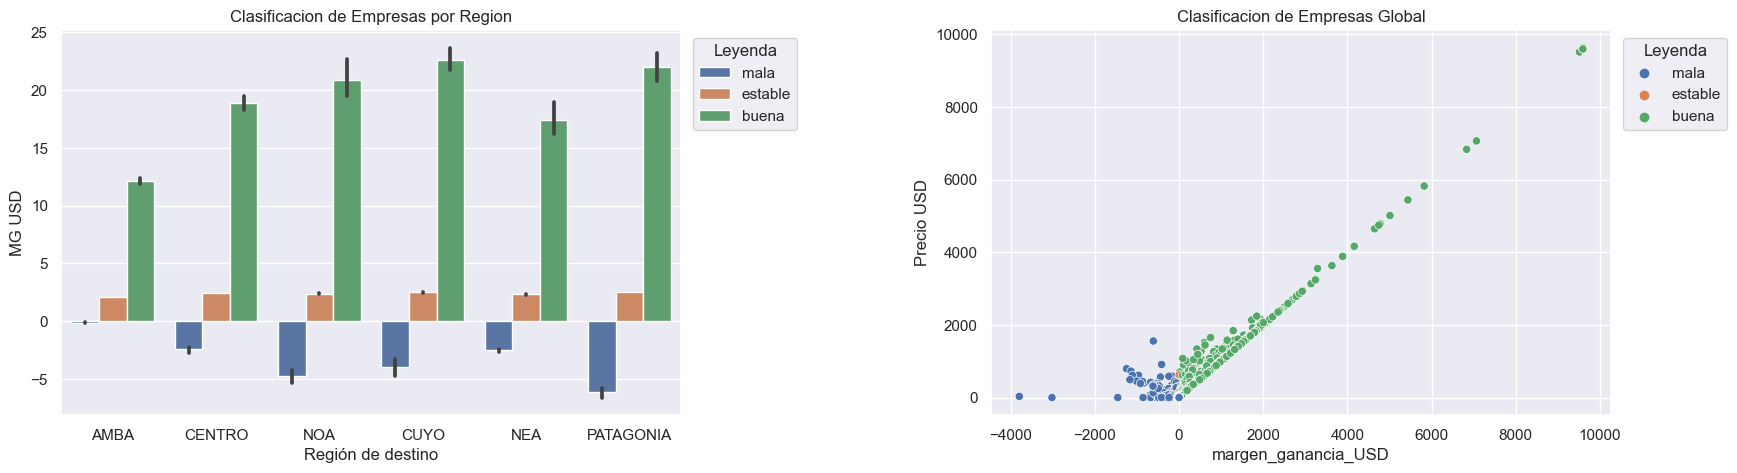

In [174]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5),gridspec_kw={'wspace': .5})

sns.barplot(x='zona_destino', y='margen_ganancia_USD', hue='percentil2', data=region_empresa, ax=axs[0]) 
axs[0].set_xlabel('Región de destino')
axs[0].set_ylabel('MG USD')
axs[0].set_title('Clasificacion de Empresas por Region')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.2, 1))

sns.scatterplot(x='margen_ganancia_USD', y='precio_USD', hue='percentil2', data=region_empresa, ax=axs[1])
axs[1].set_xlabel('margen_ganancia_USD')
axs[1].set_ylabel('Precio USD')
axs[1].set_title('Clasificacion de Empresas Global')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

⭕ Basándonos en los datos proporcionados, podemos concluir que de un total de 405 empresas, alrededor del 37% (129) se consideran buenas y el 33% (133) dejan un buen margen de ganancia. Además, el 31% (127) de las empresas tienen una alta cantidad de bultos y todas afectan positivamente en cada región.

Lo importante es que el porcentaje de la facturación total que corresponde a las 129 empresas buenas es del 93.97%, lo que sugiere que estas empresas son responsables de la mayoría de los ingresos.

En estos 2 ultimos graficos podemos ver el volumen por region de la clasificacion de las empresas. Notamos que en la patagonia hay un buen porcentaje de empresas que no aportan y son malas comparadas con las otras. En el grafico de dispercion podemos ver a nivel global como estan pocicionadas las empresas, podemos destacar que hay un conjunto minoritario que destaca sobre todas.

En resumen, esto significa que hay un grupo significativo de empresas que tienen un papel importante en la generación de ingresos y que las empresas buenas y con buen margen de ganancia son un factor clave en la rentabilidad del negocio. Sin embargo, se necesitaría más análisis para entender mejor las razones detrás del éxito de estas empresas y para identificar oportunidades de mejora para las que no se consideran buenas.

In [ ]:
#creamos un df con las variables para analizar.
grouped_USD = df_3.groupby(["fecha"]).agg({'precio':'sum', 'precio_USD':'sum', 'total_costo_USD':'sum', 'total_costo':'sum', 'margen_ganancia_USD':'sum',  'margen_ganancia':'sum'}).reset_index()

In [ ]:
#creamos un df con las variables para analizar.
grouped_USD = df_3.groupby(["fecha"]).agg({'precio':'sum', 'precio_USD':'sum', 'total_costo_USD':'sum', 'total_costo':'sum', 'margen_ganancia_USD':'sum',  'margen_ganancia':'sum'}).reset_index()

# Crear dos subgráficos separados
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Encontrar el punto máximo para bultos y envíos y añadir la anotación
max_precio = grouped_USD['precio'].max()
mean_precio = grouped_USD['precio'].mean()
min_precio = grouped_USD['precio'].min()
max_usd = grouped_USD['precio_USD'].max()
mean_usd = grouped_USD['precio_USD'].mean()
min_usd = grouped_USD['precio_USD'].min()
pendiente1 = ((max_precio - mean_precio) - min_precio) / len(grouped_USD['fecha'])
pendiente2 = ((max_usd - mean_usd) - min_usd) / len(grouped_USD['fecha'])

# Graficar el primer subgráfico
sns.lineplot(data=grouped_USD, x="fecha", y="precio", label="Precio ($)", ax=axs[0])
sns.lineplot(data=grouped_USD, x="fecha", y="total_costo", label="Costo Total ($)", ax=axs[0])
sns.lineplot(data=grouped_USD, x="fecha", y="margen_ganancia", label="Margen de Ganancia ($)", ax=axs[0])
axs[0].set_title("Distribución de precios en $ por mes y año")
axs[0].set_xlabel("Mes")
axs[0].set_ylabel("Precio")
axs[0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(0.1, 1))
axs[0].text(0.05, 0.6, f"Pendiente Precio: {pendiente1:.2f}", transform=axs[0].transAxes)

axs[0].annotate(f'Máximo Precio: {max_precio}',
                 xy=(grouped_USD[grouped_USD['precio'] == max_precio]['fecha'].iloc[0],
                     max_precio),
                 xytext=(grouped_USD[grouped_USD['precio'] == max_precio]['fecha'].iloc[0],
                         max_precio+10),
                 ha='right', fontsize=10, arrowprops=dict(facecolor='black', shrink=0.1))

axs[1].annotate(f'Máximo Precio USD: {max_usd}',
                 xy=(grouped_USD[grouped_USD['precio_USD'] == max_usd]['fecha'].iloc[0],
                     max_usd),
                 xytext=(grouped_USD[grouped_USD['precio_USD'] == max_usd]['fecha'].iloc[0],
                         max_usd+10),
                 ha='right', fontsize=10, arrowprops=dict(facecolor='black', shrink=0.1))

sns.lineplot(data=grouped_USD, x="fecha", y="precio_USD", label="Precio (USD) oficial", ax=axs[1])
sns.lineplot(data=grouped_USD, x="fecha", y="total_costo_USD", label="Costo (USD) oficial", ax=axs[1])
sns.lineplot(data=grouped_USD, x="fecha", y="margen_ganancia_USD", label="M de Gan (USD) oficial", ax=axs[1])
axs[1].set_title("Distribución de precios en USD BNA OFICIAL por mes y año")
axs[1].set_xlabel("Mes")
axs[1].set_ylabel("Precio")
axs[1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(0.1, 1))
axs[1].text(0.05, 0.6, f"Pendiente Precio USD: {pendiente2:.2f}", transform=axs[1].transAxes)

plt.show()



⭕En este conjunto de gráficos podemos visualizar la distribución de precios, costos y márgenes de ganancia en dólares (moneda dura) y en pesos argentinos (moneda volatil), así como también la cantidad de envíos y bultos por mes y año.

En cuanto a la distribución de precios, se puede observar que el precio en pesos argentinos tiene un comportamiento positivo en alza por lo que podemos concluir que durante el período del 01-01-2020 al 31-12-2022, el precio en pesos experimentó una fuerte tendencia al alza devido a la inflacion con una pendiente de 3.802.768,89 alcanzando un máximo de facturacion de $210.105.717,14. Por otro lado, el precio en dólares también experimentó un aumento en el mismo período, aunque con una pendiente mucho menor de 16.445,55 y un máximo de us$1.266.409,43. Estos resultados indican que el negocio  ha sido más rentable en pesos que en dólares durante este período de tiempo.

### ⏩ **8. <u>Correlaciones entre las variables</u>** 

In [ ]:
plt.figure(figsize = (15,15))
plt.axis('scaled')
sns.heatmap(df_3.corr(numeric_only = True).round(1), vmin=-1, vmax=1, cmap = "YlOrRd", cbar = True, annot = True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 14)
plt.show()

Las variables categóricas que podrían utilizarse para *predecir el precio* de los envíos incluyen **tipo de operación, grupo, estado, localidad de destino, provincia de destino, zona de destino, subzona de destino, localidad de origen, provincia de origen, zona de origen, subzona de origen, movimiento y mes**. Para predecir el precio de los envíos, un *modelo de regresión* podría ser útil, en particular un modelo de *regresión lineal múltiple* que permita modelar la relación entre múltiples variables predictoras y la variable objetivo. Esto podría ser útil para una mejor planificación de la logística, identificación de oportunidades de ahorro de costos y la capacidad de proporcionar cotizaciones más precisas a los clientes.

### ⏩ **9. <u>Insights y recomendaciones</u>** 

En términos de envío y manejo de bultos, la región de **AMBA** se destaca claramente sobre las otras regiones, lo que sugiere que esta región es la más importante en el negocio de logística. Además, al analizar la distribución de los tipos de operaciones por movimiento, se han identificado los meses más relevantes para cada zona en términos de envíos y bultos, lo que podría ser útil para una planificación eficiente de los recursos.

Al examinar la distribución de *precios*, *costos* y *márgenes de ganancia*, se ha identificado un estancamiento o desactualización en las listas de precios, lo que podría indicar una necesidad de revisar las estrategias de precios. También se ha identificado que hay algunas empresas consideradas buenas como por ejemplo (AgroEco SA', ' AgroSur', ' Agroindustrias', ' Anima Solution') y que dejan un buen margen de ganancia, mientras que otras no suman ni aportan mucho al crecimiento como (GenoTech SA', ' Geomar', ' GigaNet SA', ' GlobeWorks SRL'), por lo que se podrían explorar oportunidades de colaboración o reevaluar la relación comercial con estas empresas.

Las variables categóricas que podrían utilizarse para *predecir el precio* de los envíos incluyen **tipo de operación, grupo, estado, localidad de destino, provincia de destino, zona de destino, subzona de destino, localidad de origen, provincia de origen, zona de origen, subzona de origen, movimiento y mes**. Para predecir el precio de los envíos, un *modelo de regresión* podría ser útil, en particular un modelo de *regresión lineal múltiple* que permita modelar la relación entre múltiples variables predictoras y la variable objetivo. Esto podría ser útil para una mejor planificación de la logística, identificación de oportunidades de ahorro de costos y la capacidad de proporcionar cotizaciones más precisas a los clientes.

En base a los resultados, se recomienda aprovechar la fortaleza de la región de **AMBA** para mejorar la eficiencia operativa, mientras se presta atención a otras regiones como **CENTRO**, **CUYO**, **NEA**, **NOA** y **PATAGONIA** para estimular su crecimiento. Asimismo, una planificación adecuada de la asignación de recursos en función a los siguiente:
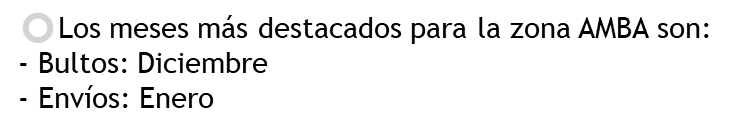
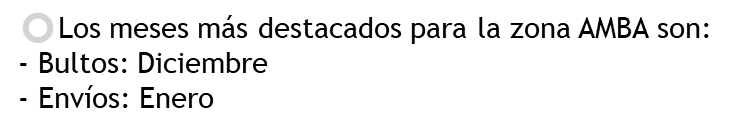
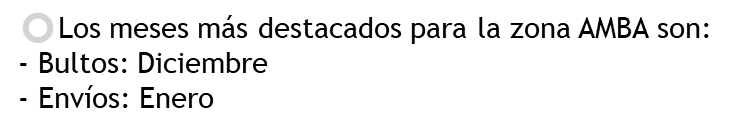
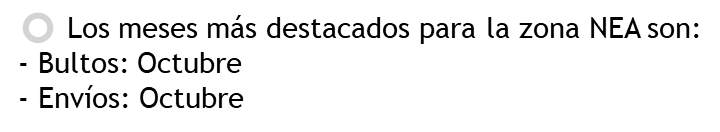
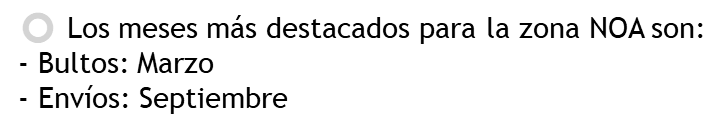
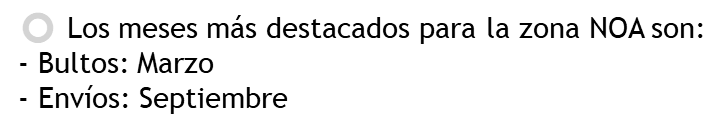

de esta forma se estaria preparado para los picos de actividad y mejorar la eficiencia operativa. Se recomienda además analizar mensualmente los precios de venta y costos pra aquellas empresas calificadas como malas.